In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [27]:
def plot_result(img_path, img_name, save_path='', channels=False):
    img = cv2.imread(img_path)
    _, _, colorChannel = img.shape
    colors = ['B', 'G', 'R']

    plt.figure(figsize=(10, 5), dpi=300)

    # Plot histogram&cdf with RGB channels separately
    if channels:

        for i in range(colorChannel):
            # Histogram
            hist, bins = np.histogram(img[:, :, i].flatten(), 256, [0, 256])

            # Plot histogram
            plt.hist(img[:, :, i].flatten(), 256, [0, 256], label = colors[i] + '_histogram')
            plt.legend(loc='best')
            plt.xlim([0,256])

        
        for i in range(colorChannel):
            # Cdf
            hist, bins = np.histogram(img[:, :, i], 256, [0, 256])
            cdf = np.cumsum(hist/np.sum(hist))
            # Normalize cdf
            cdf = cdf * float(hist.max()) / cdf.max() 

            # Plot cdf
            plt.plot(cdf, label = colors[i] + '_cdf')
            plt.xlim([0,256])
        

    # Plot histogram&cdf of the image
    else:

        # Histogram
        hist, bins = np.histogram(img.flatten(), 256, [0, 256])

        # Plot histogram
        plt.hist(img.flatten(), 256, [0, 256], label = 'histogram', color='r')
        plt.legend(loc='best')
        plt.xlim([0,256])

        # Cdf
        pdf = hist/np.sum(hist)
        cdf = pdf.cumsum()
        # Normalize cdf
        cdf = cdf * float(hist.max()) / cdf.max() 

        # Plot cdf
        plt.plot(cdf, label = 'cdf', color = 'b')
        plt.xlim([0,256])
    
    plt.title(img_name)
    plt.legend(loc='best')
    if not save_path=='':
        plt.savefig(save_path)
    plt.show()


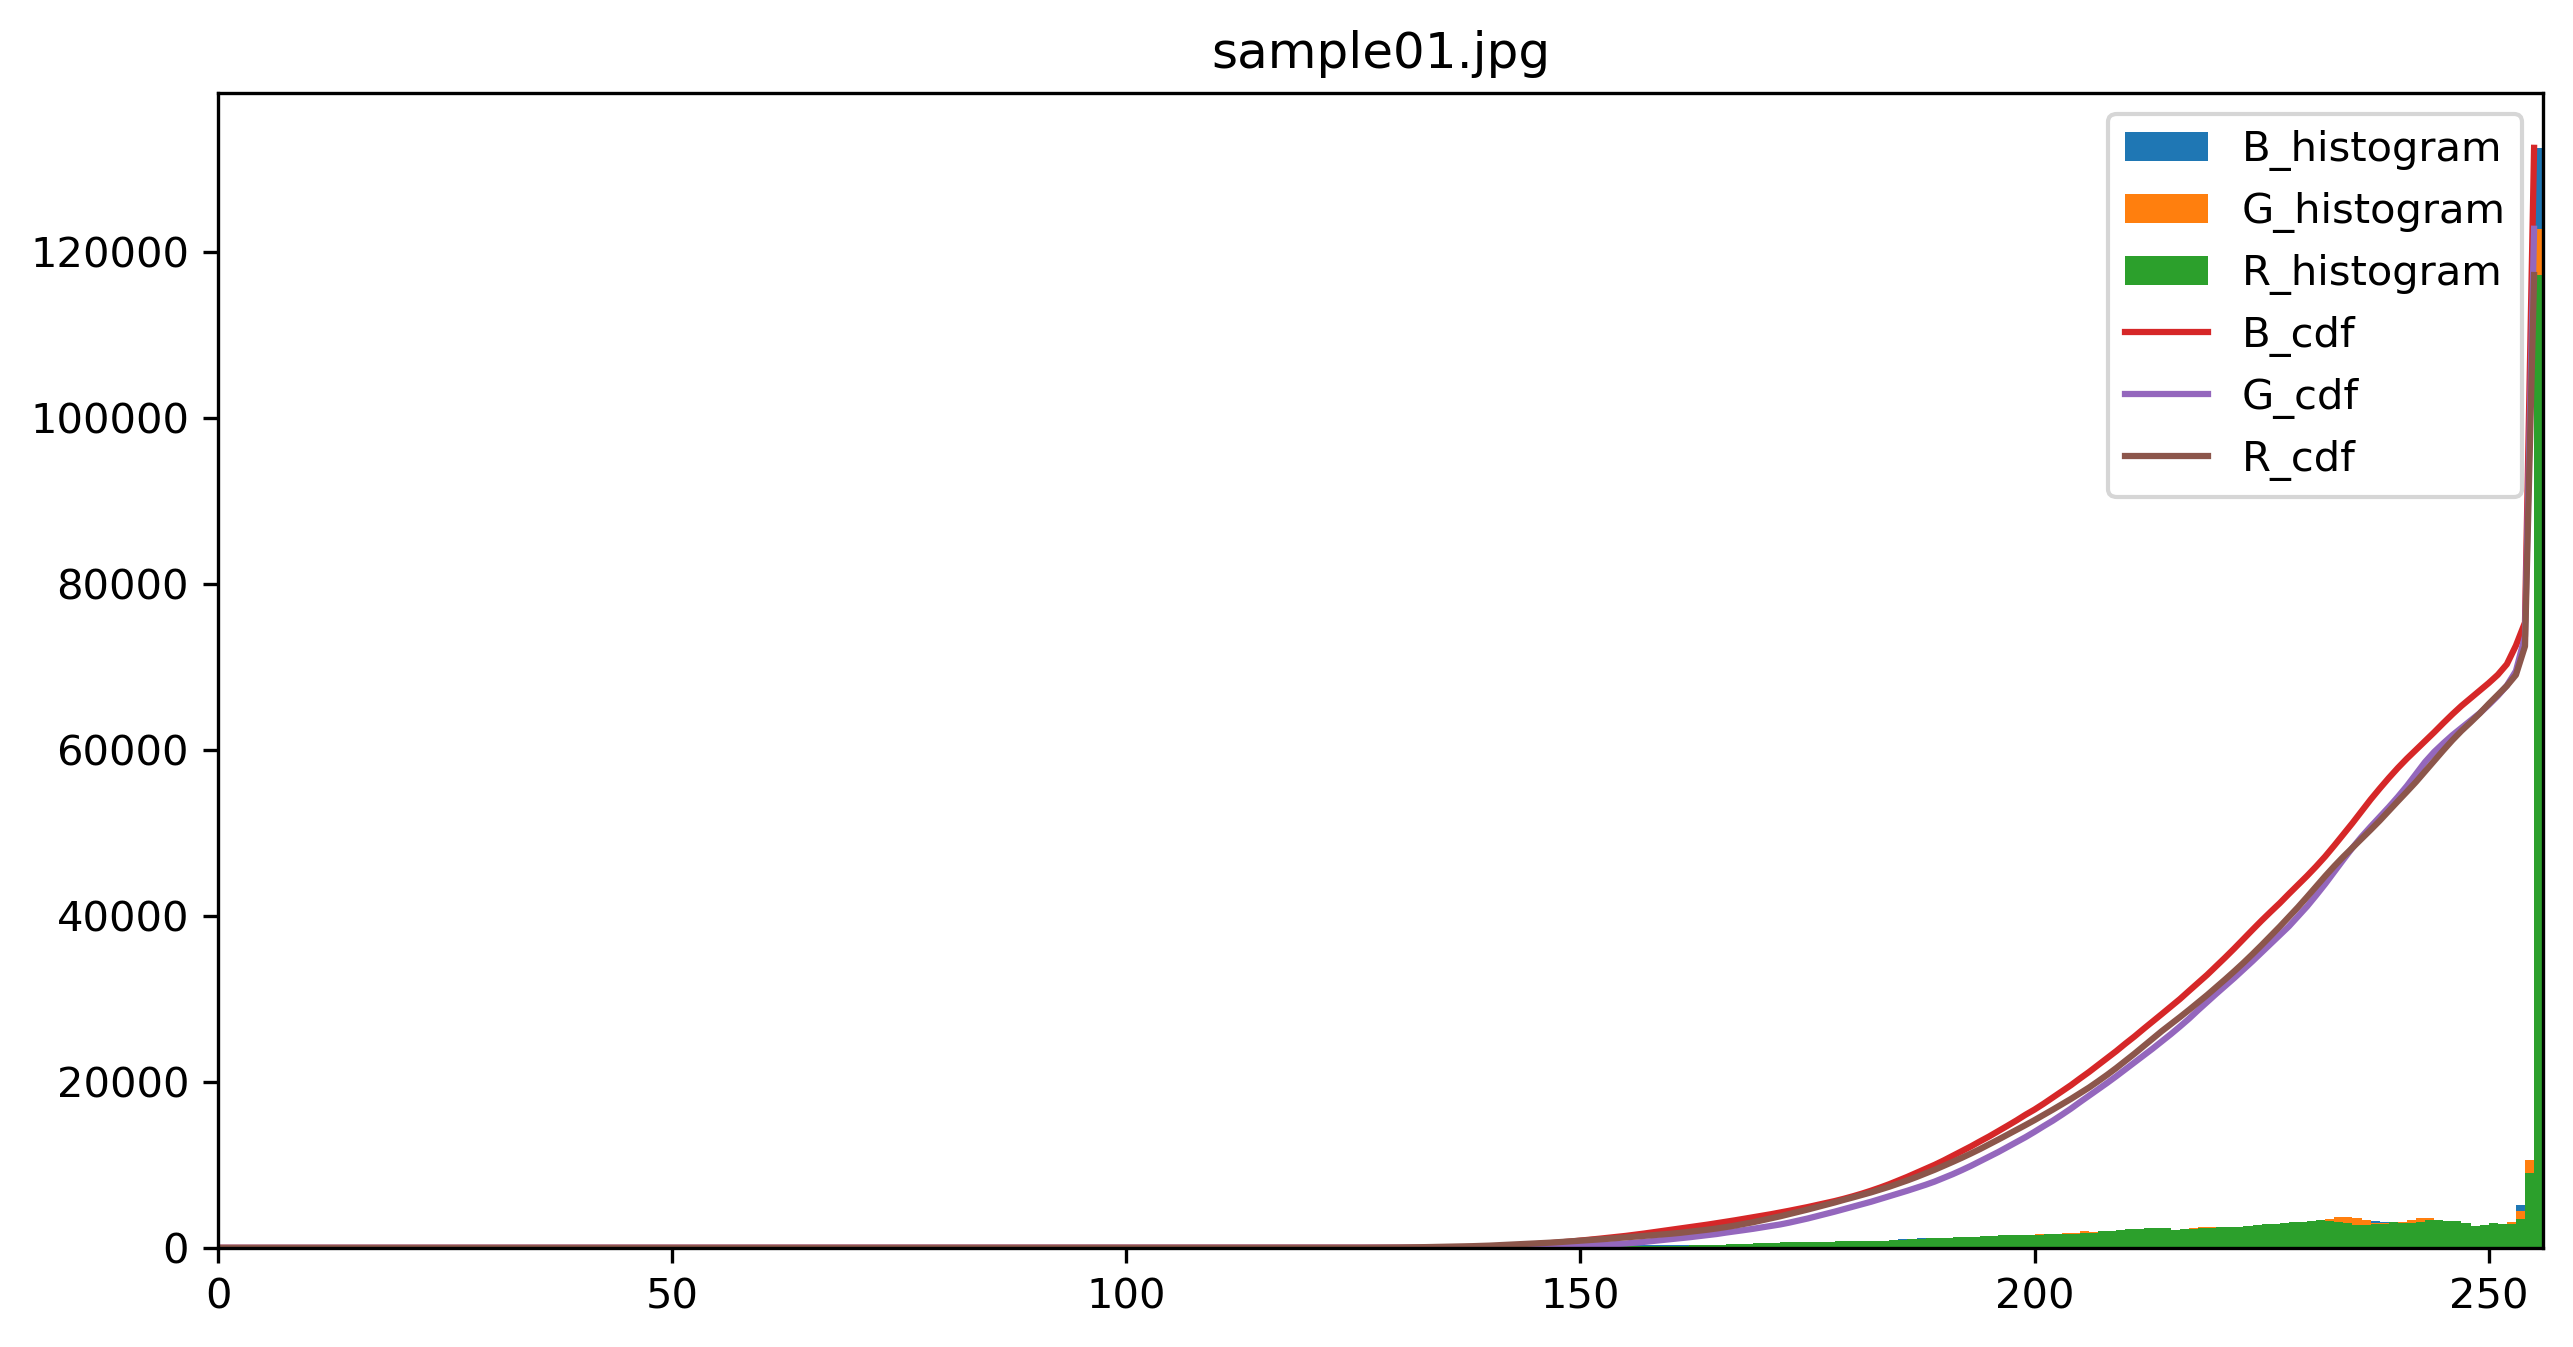

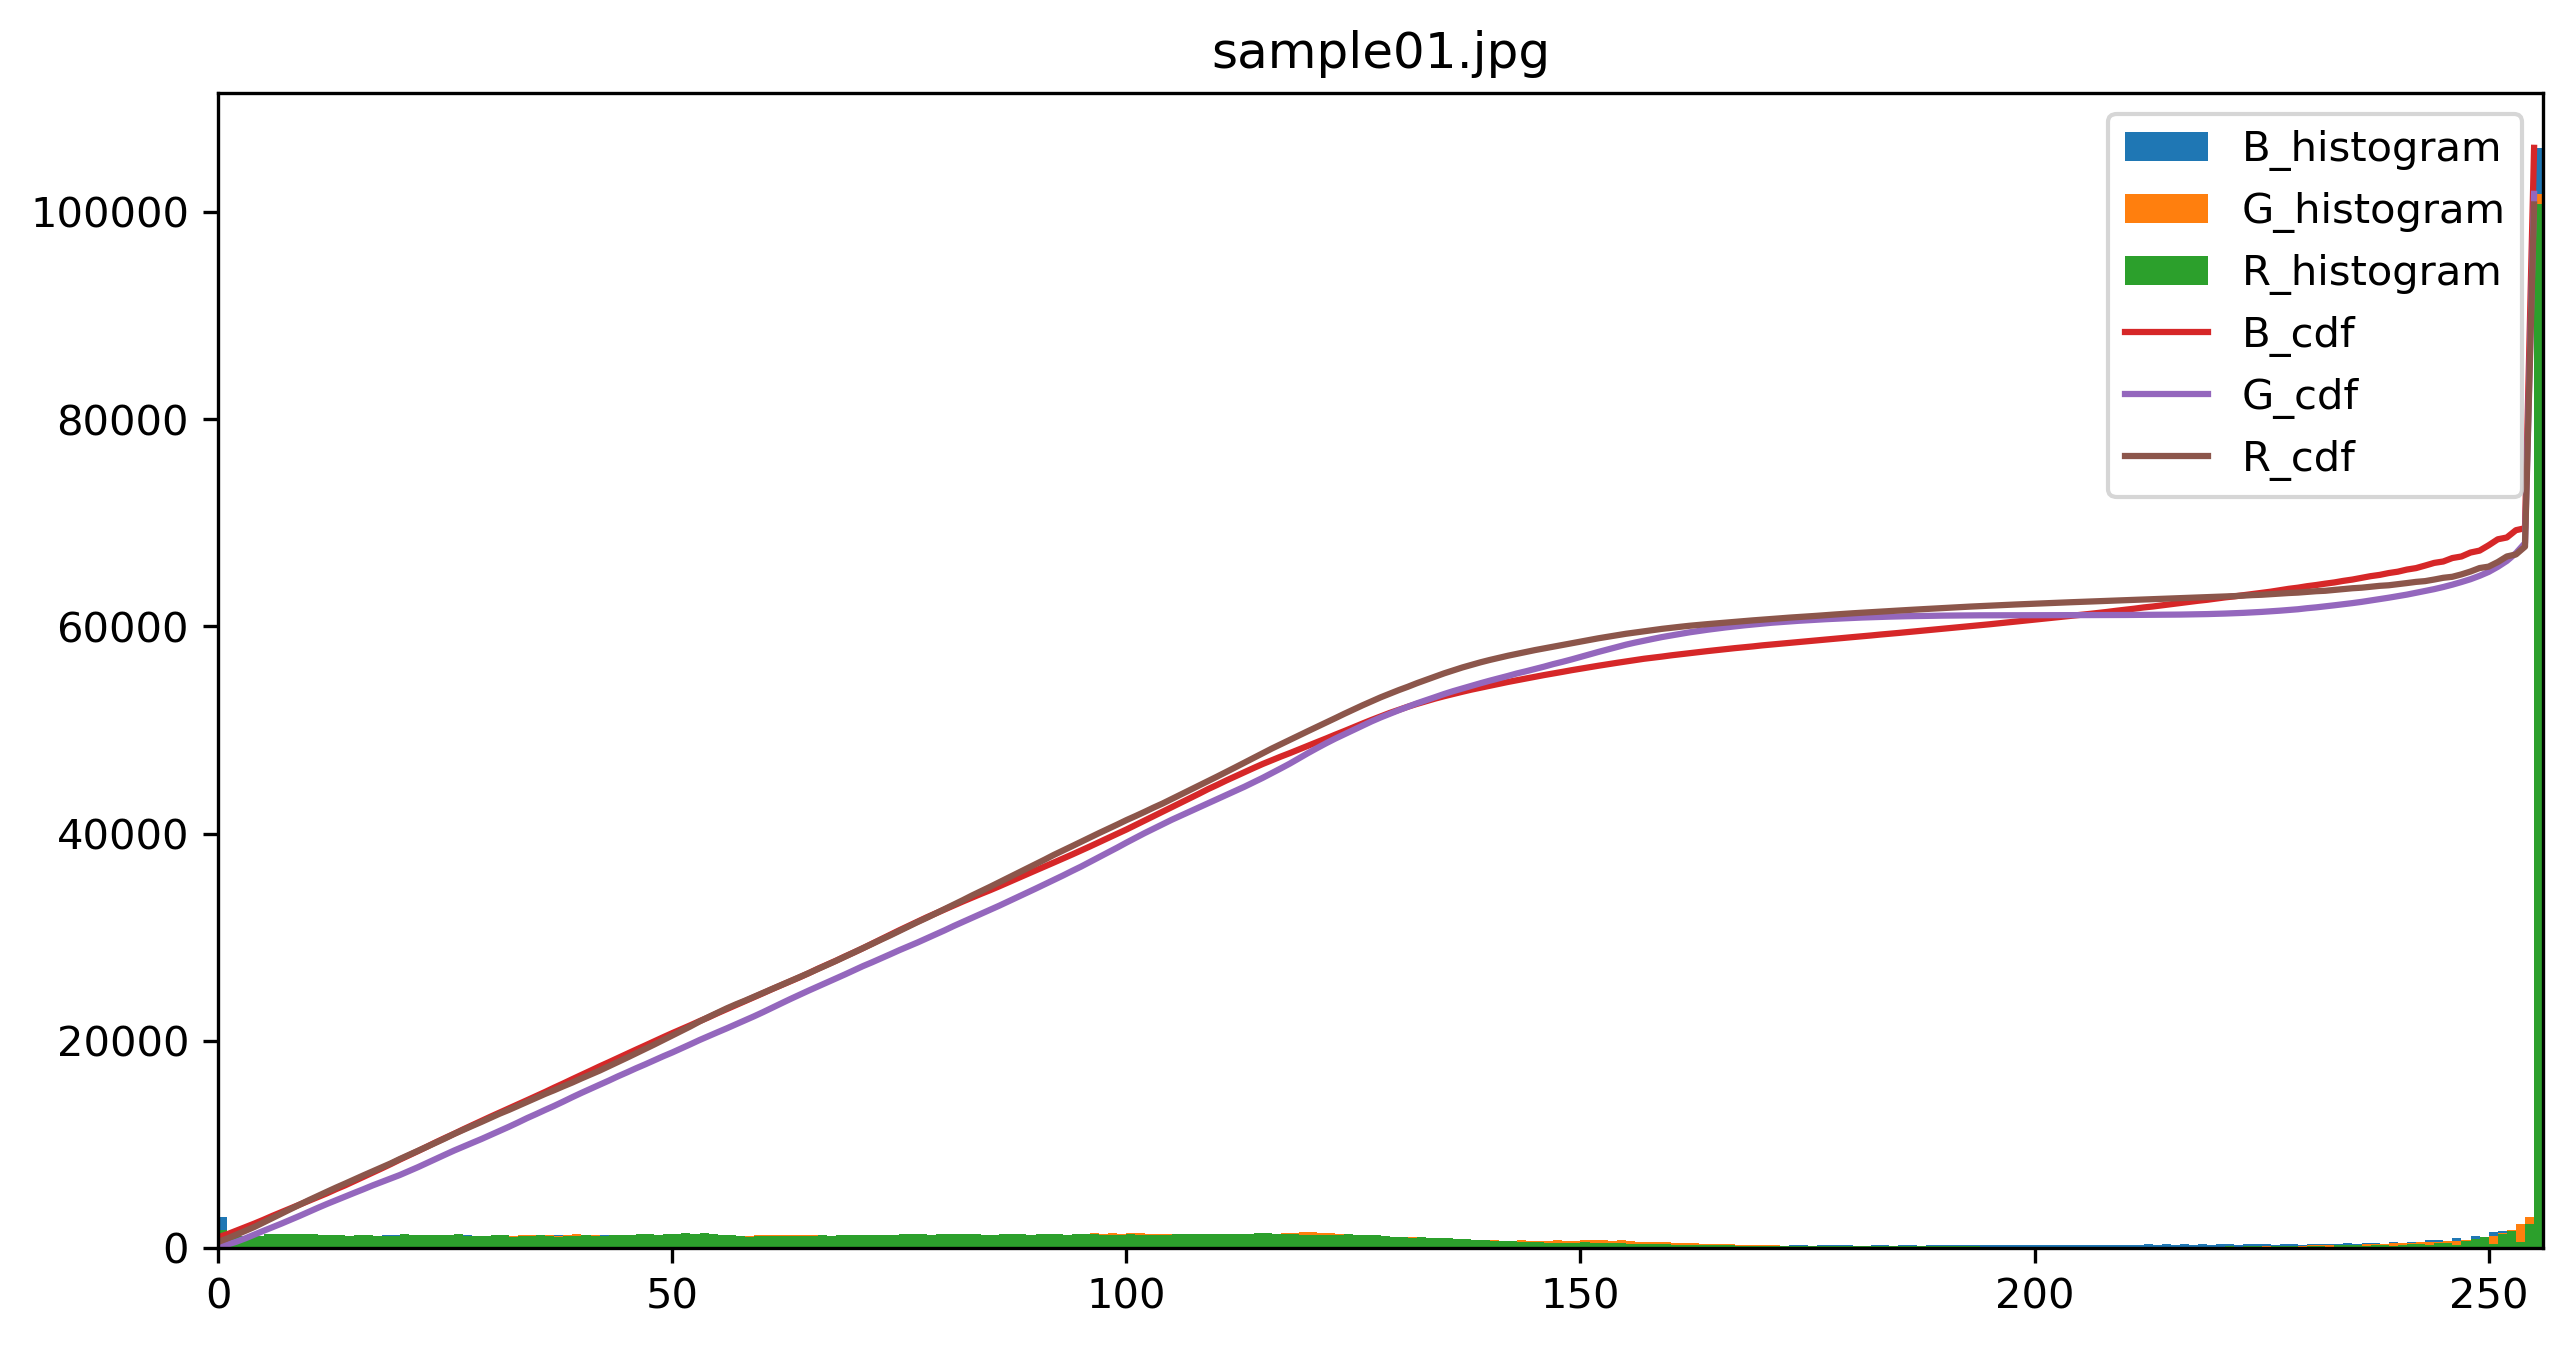

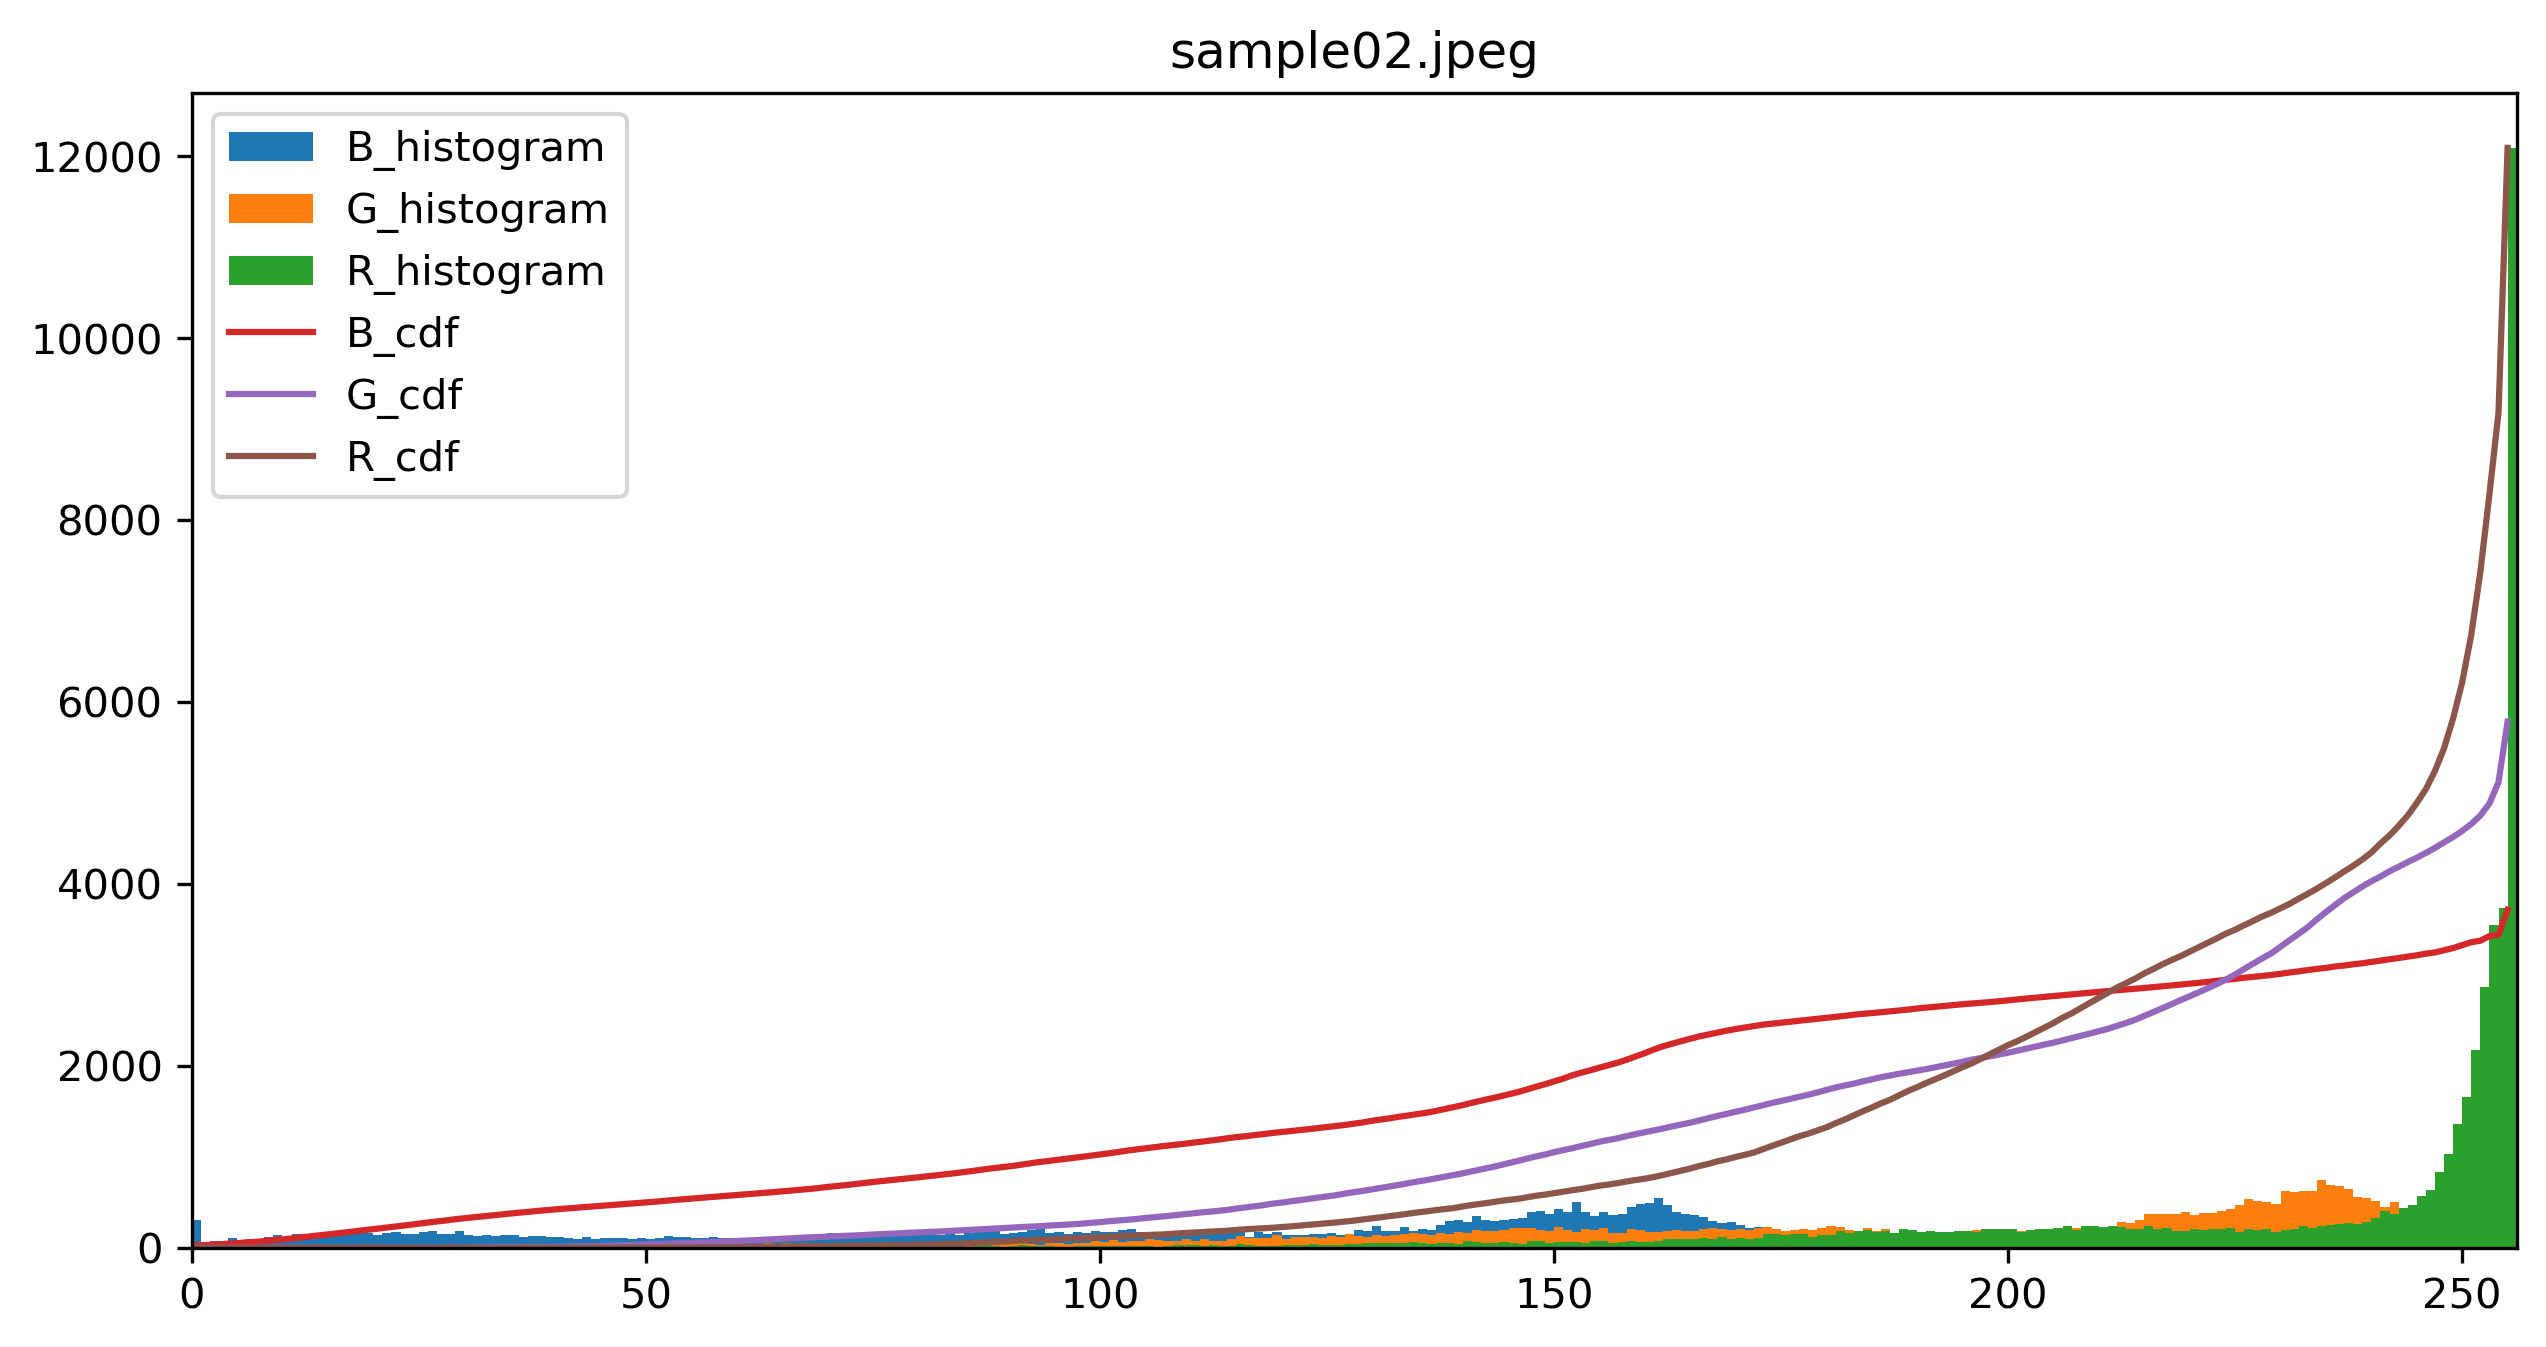

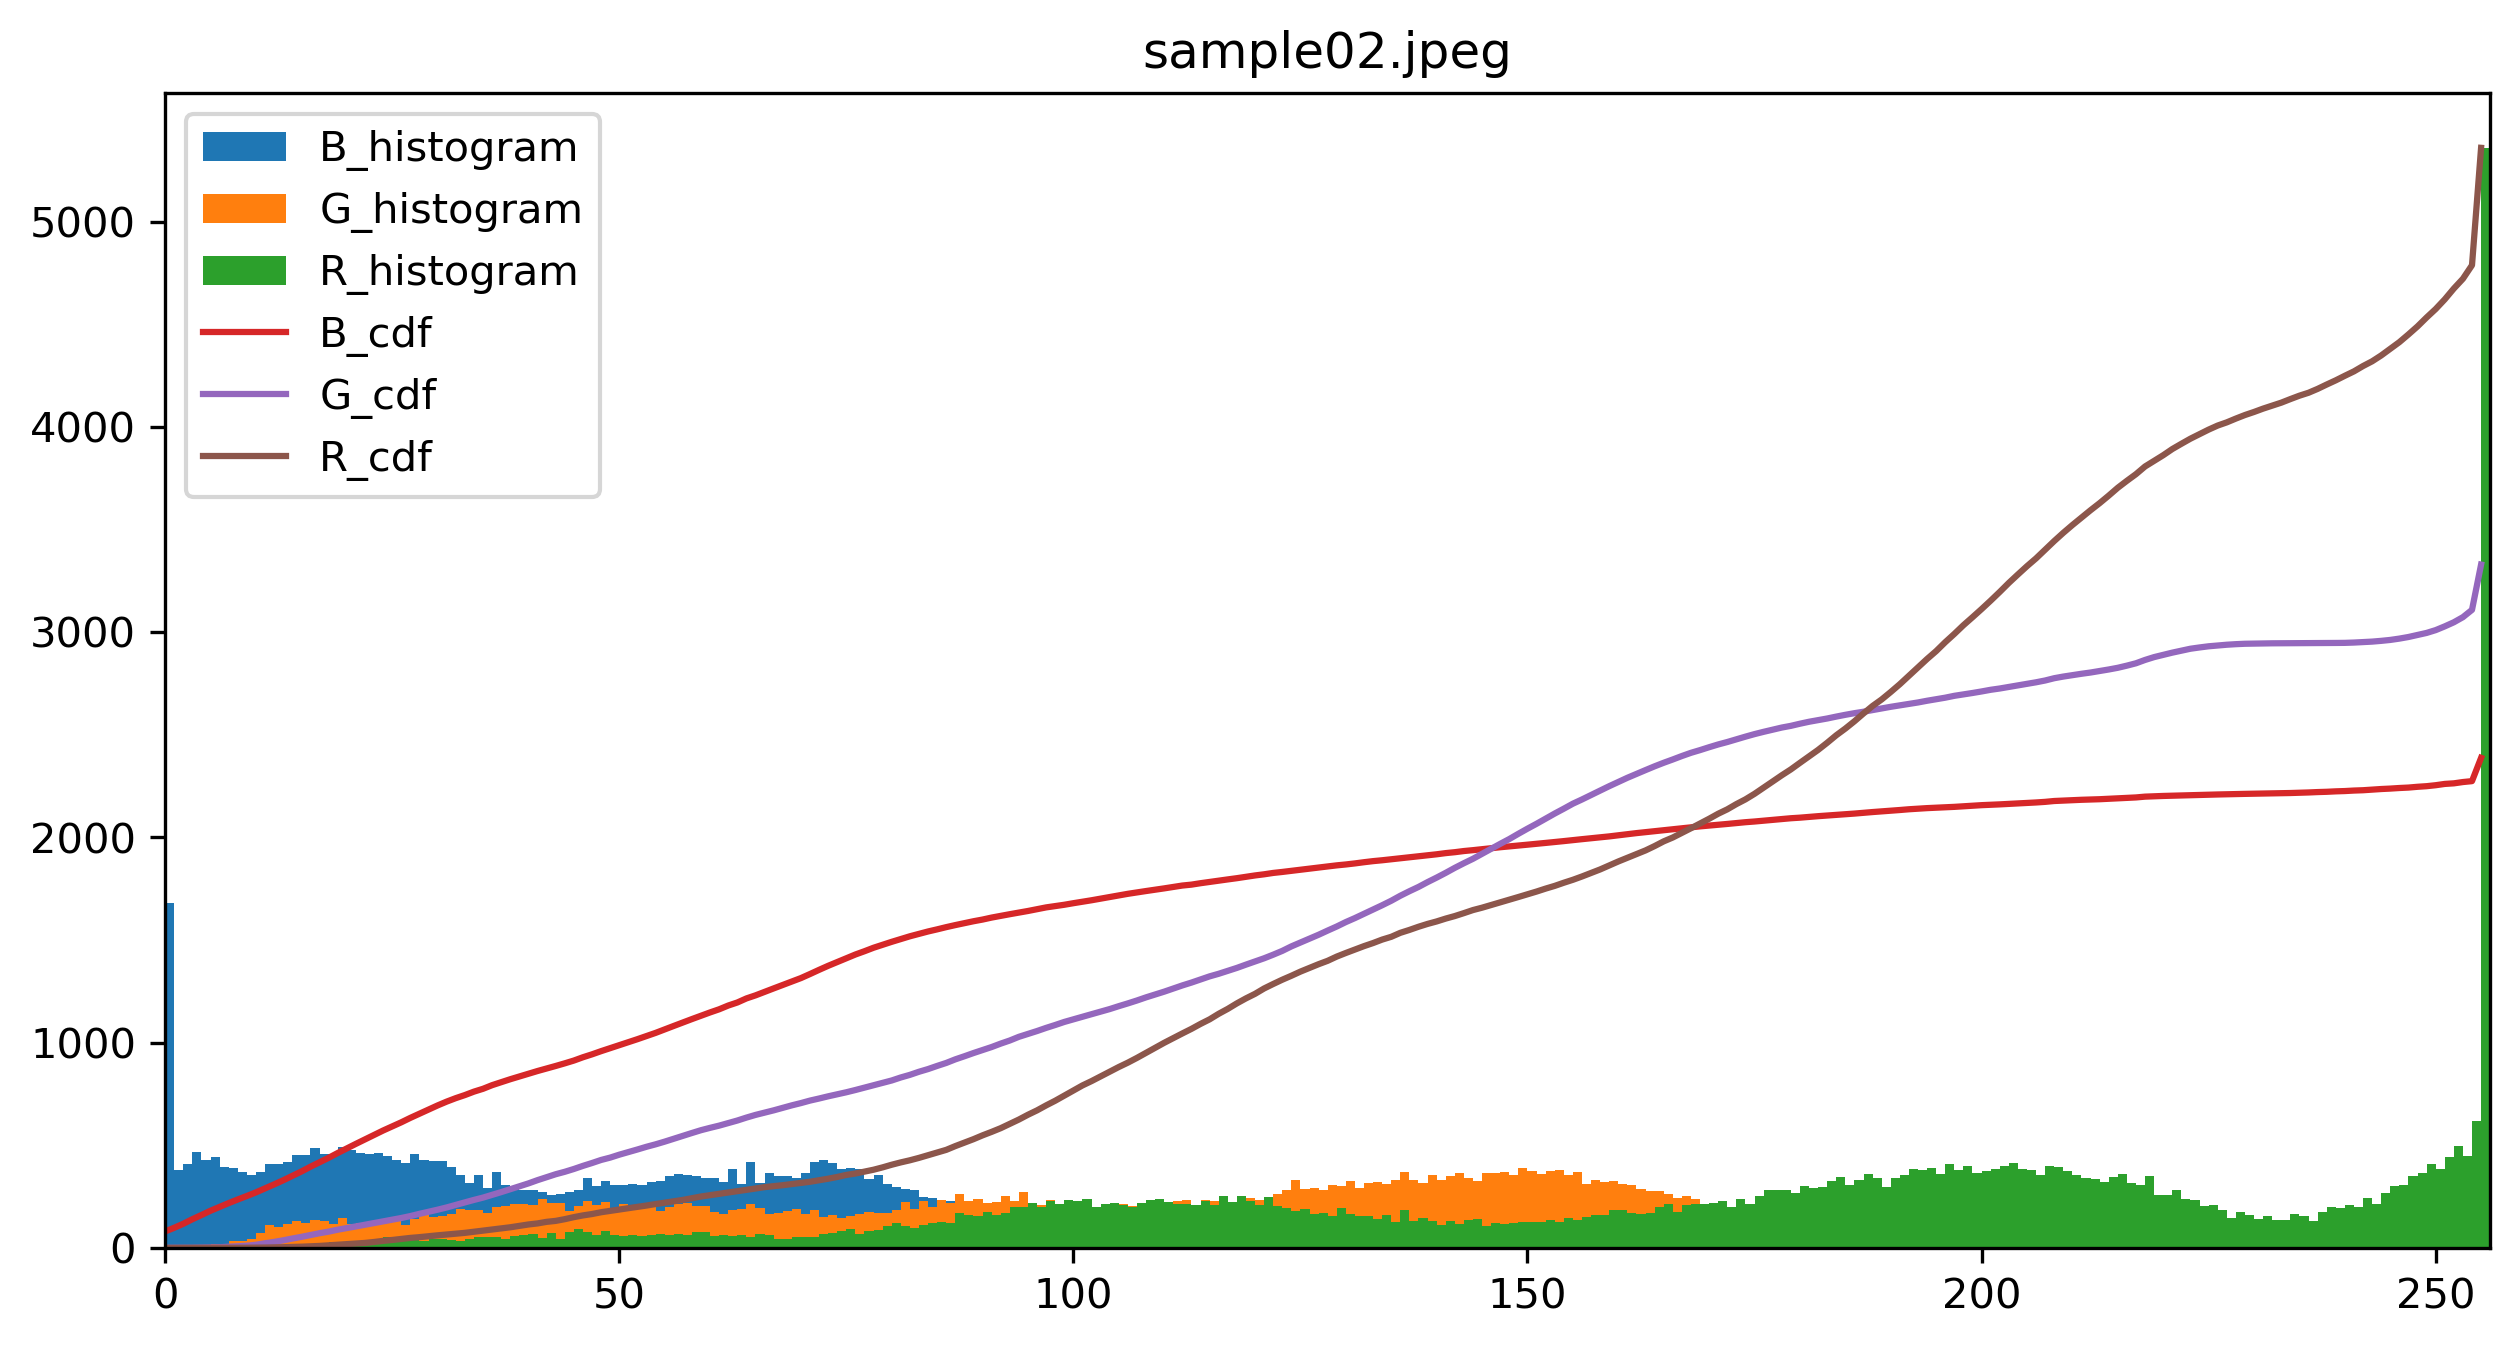

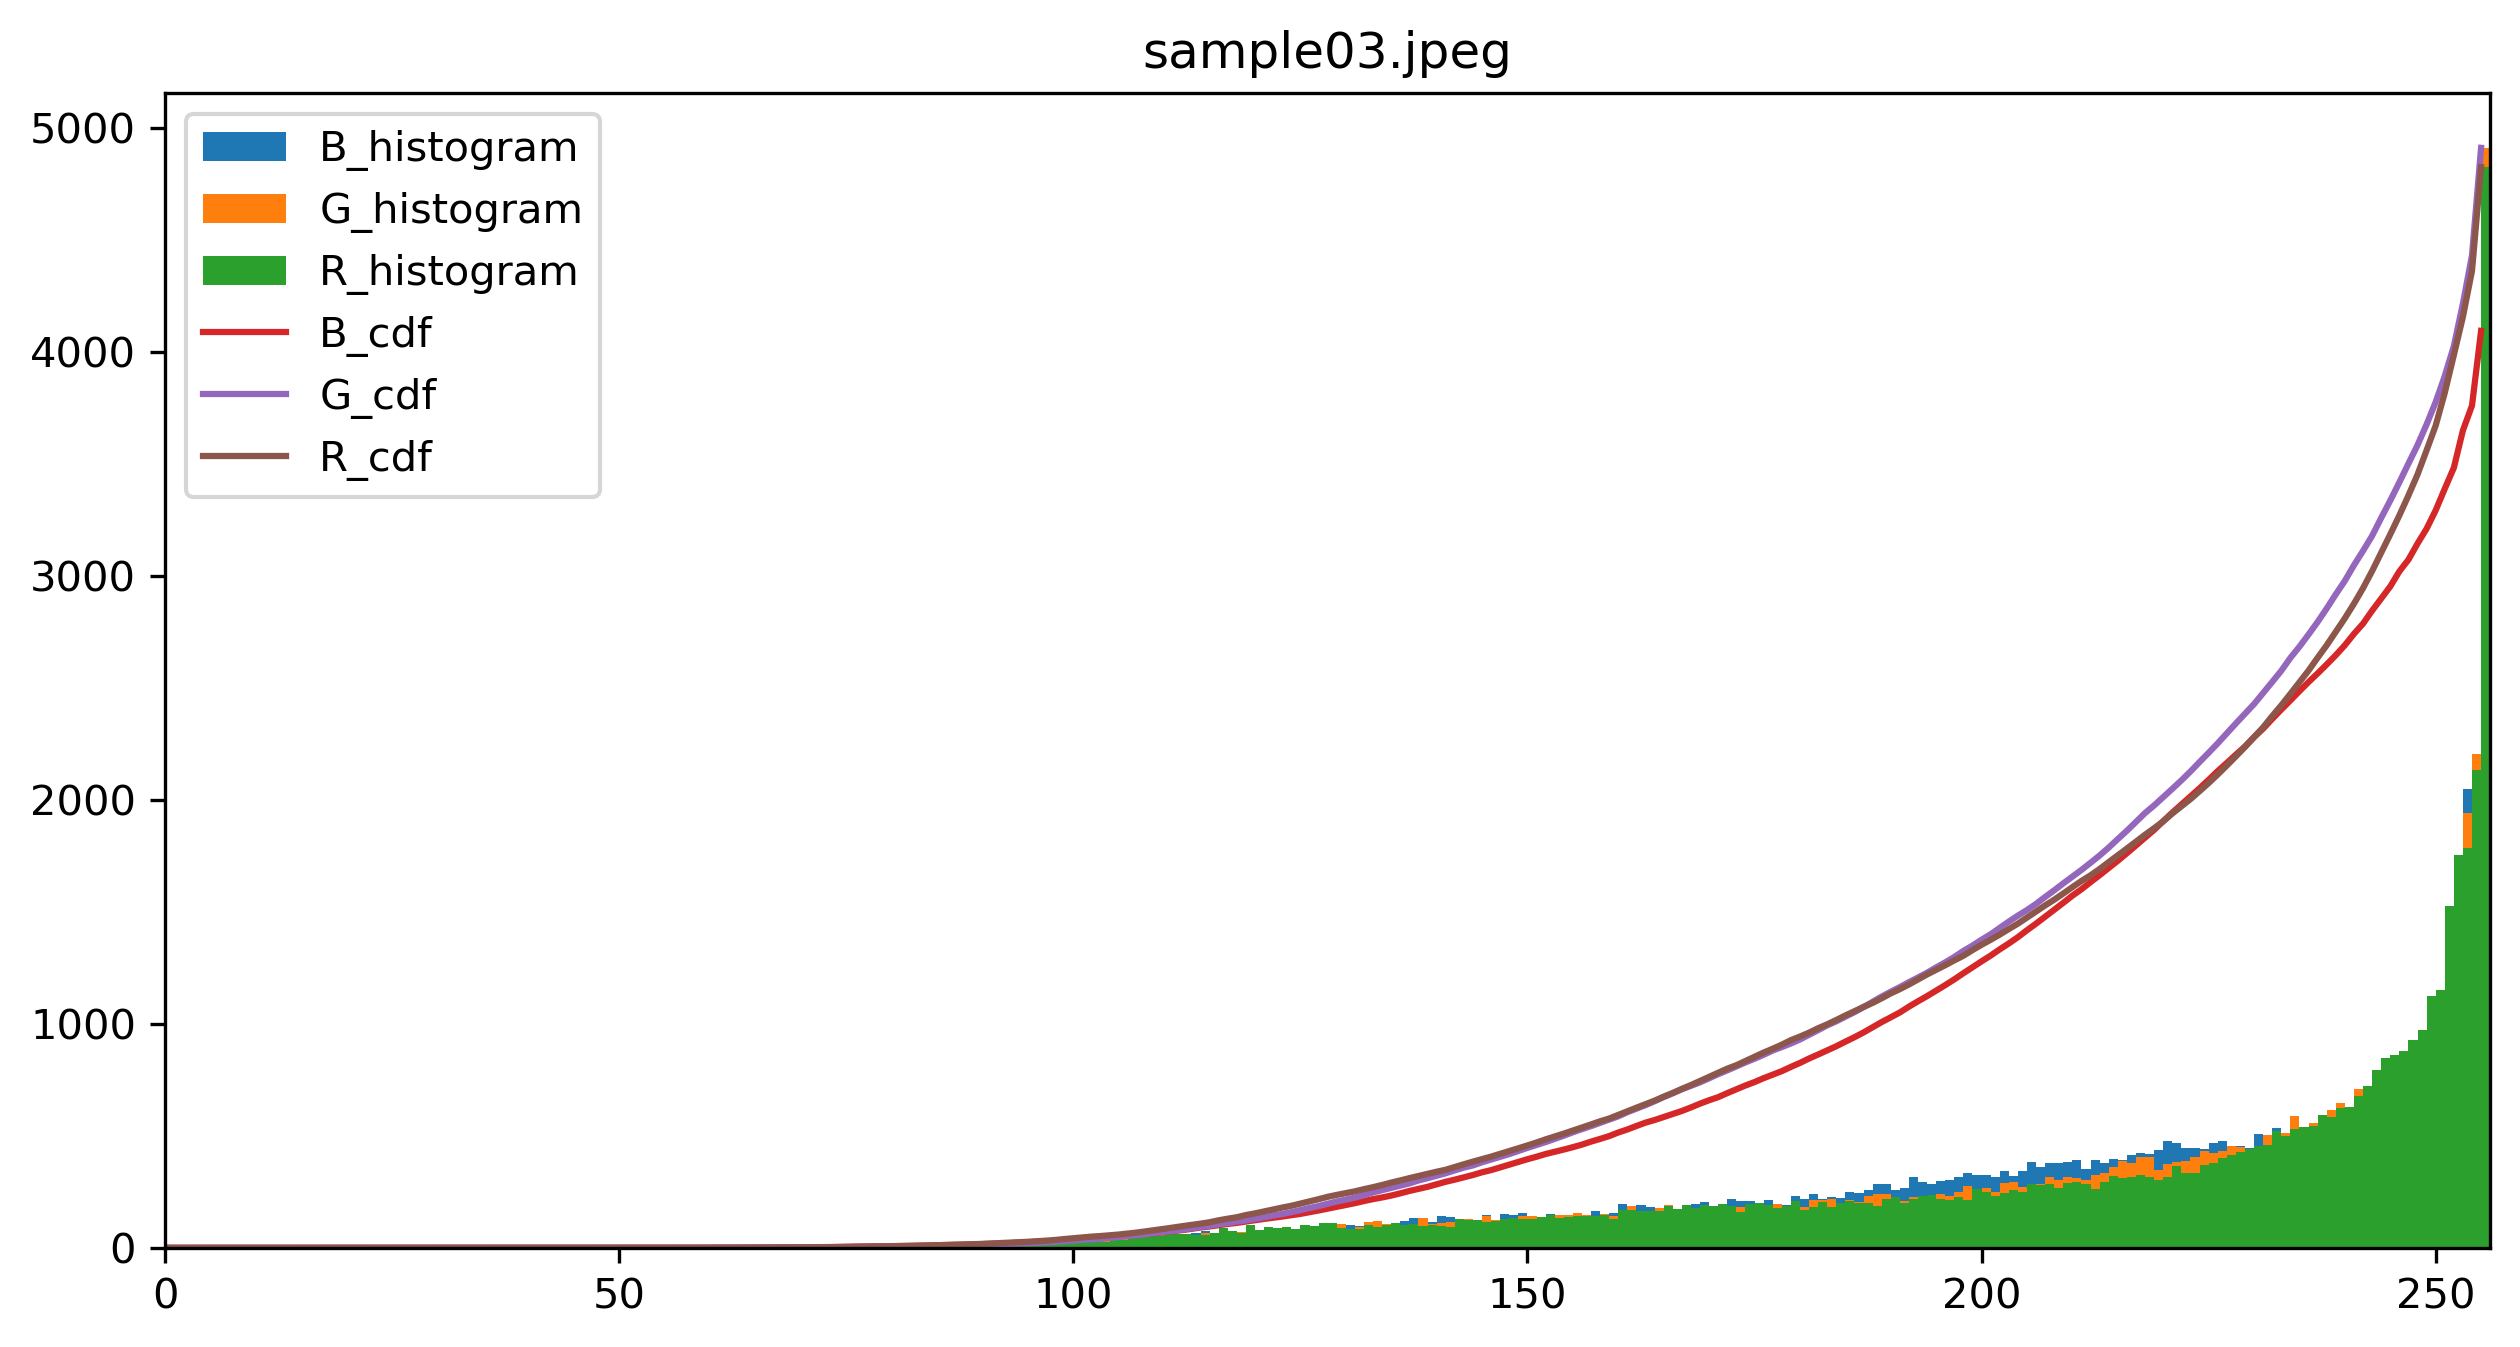

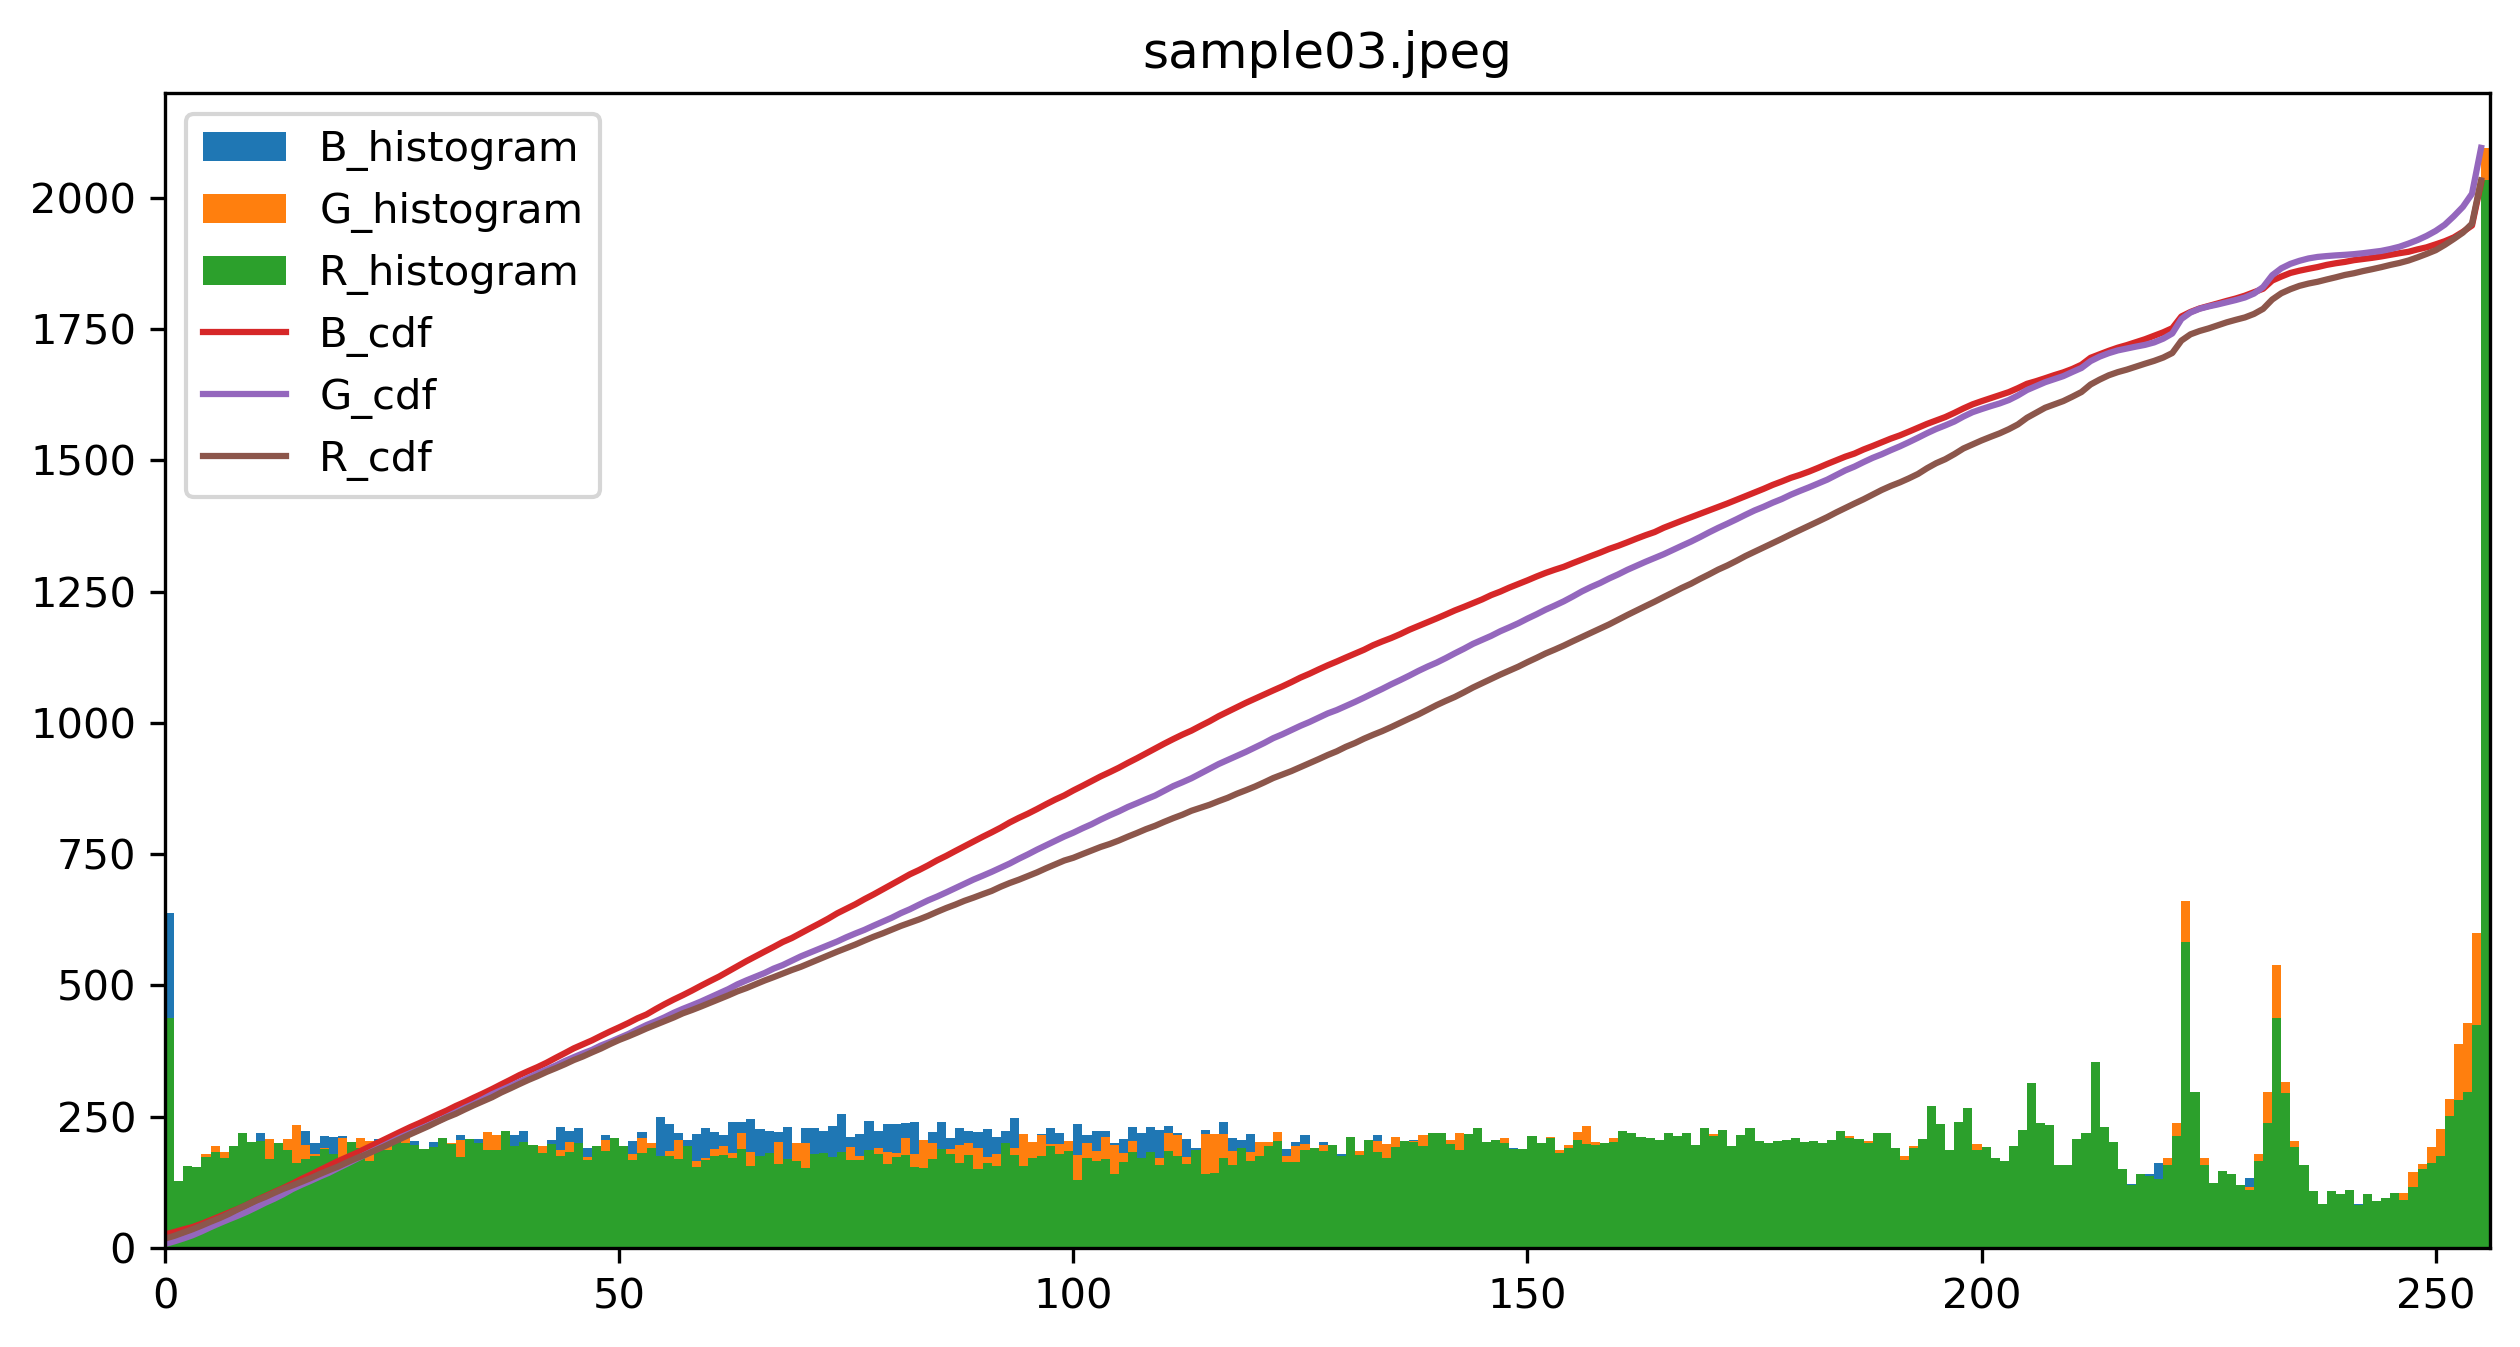

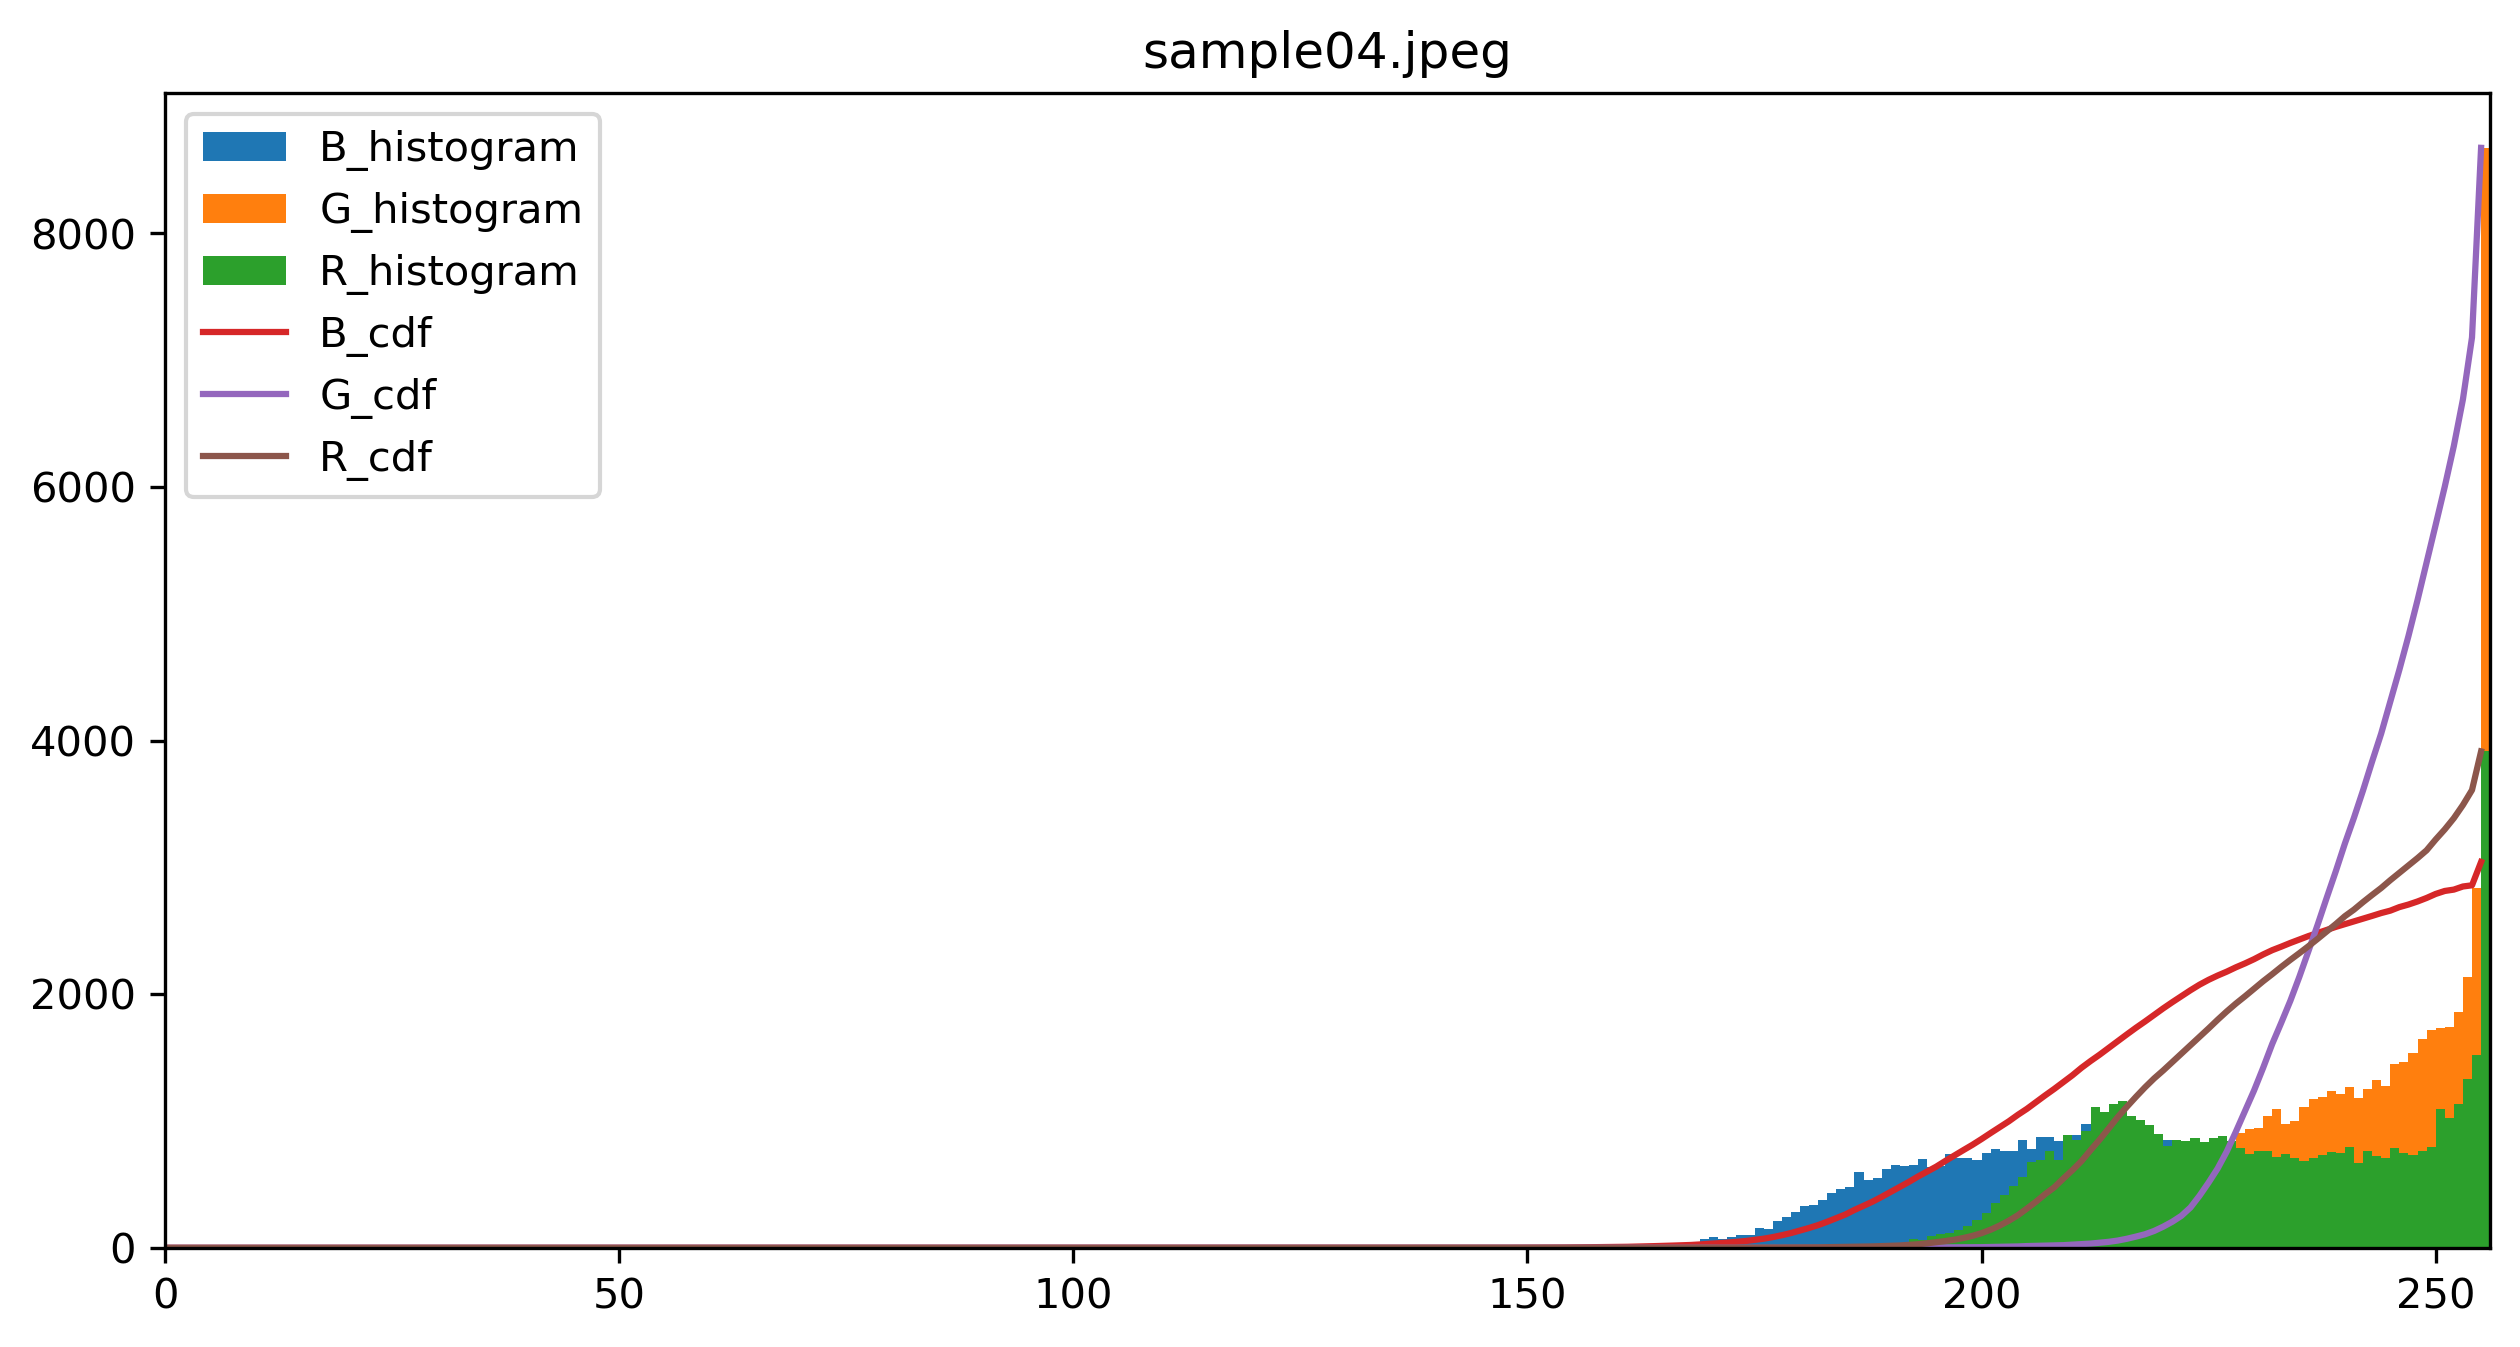

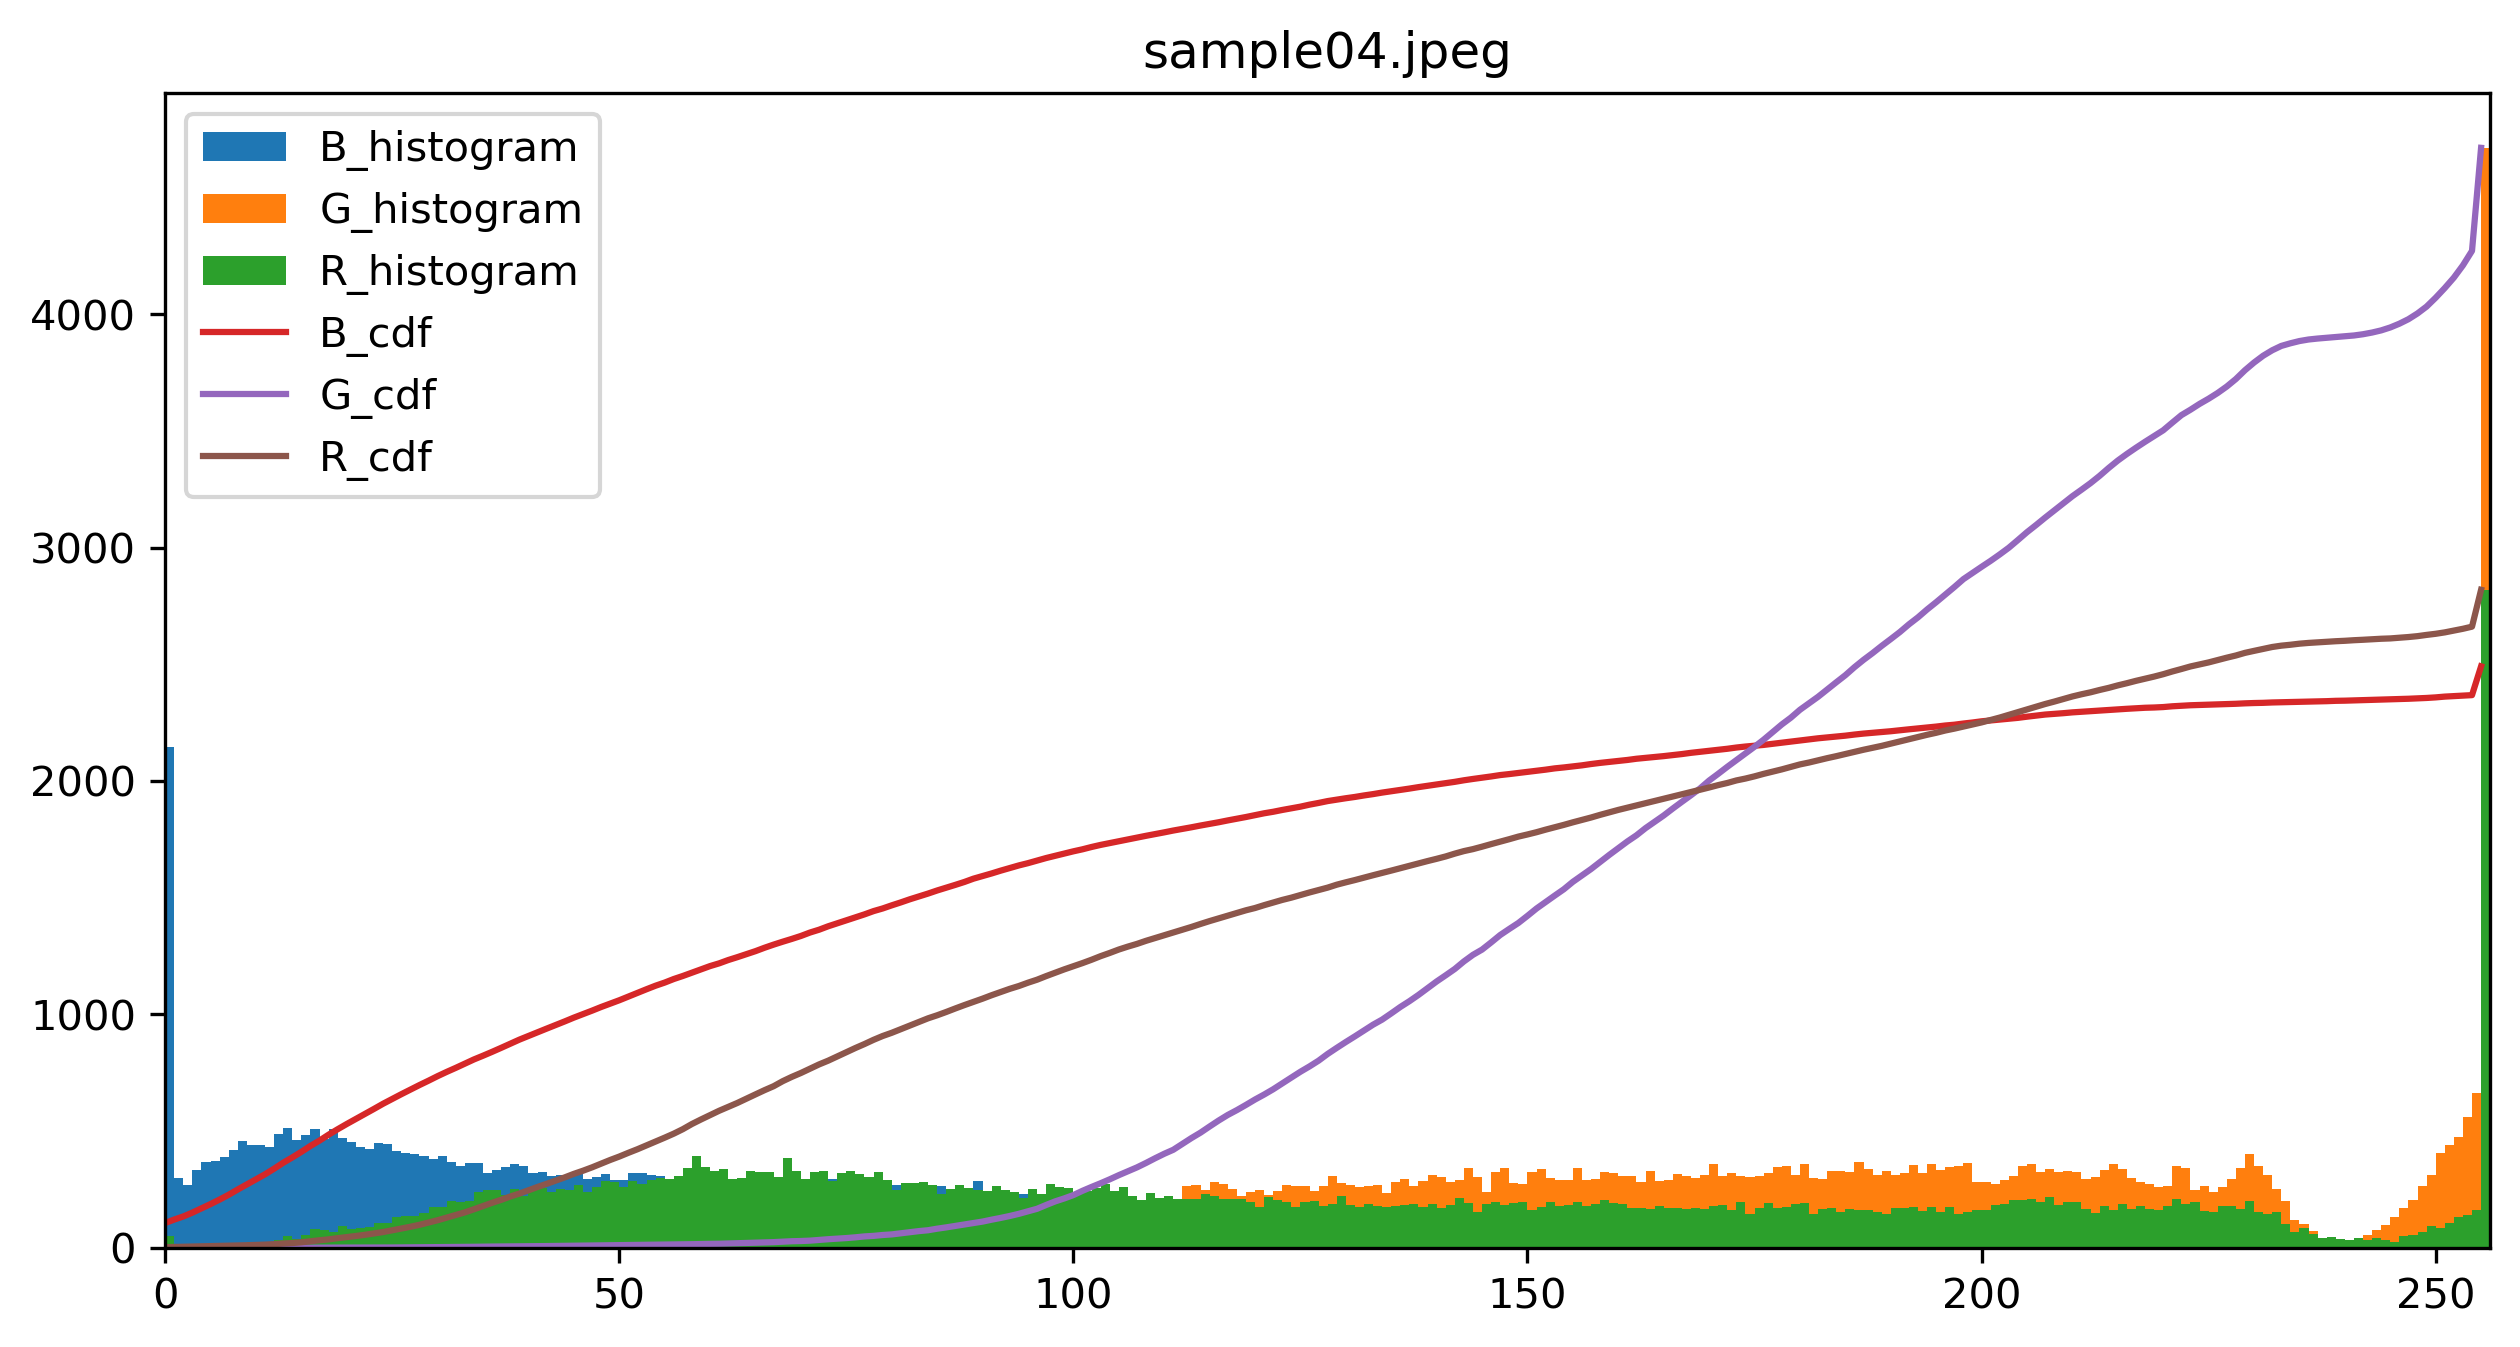

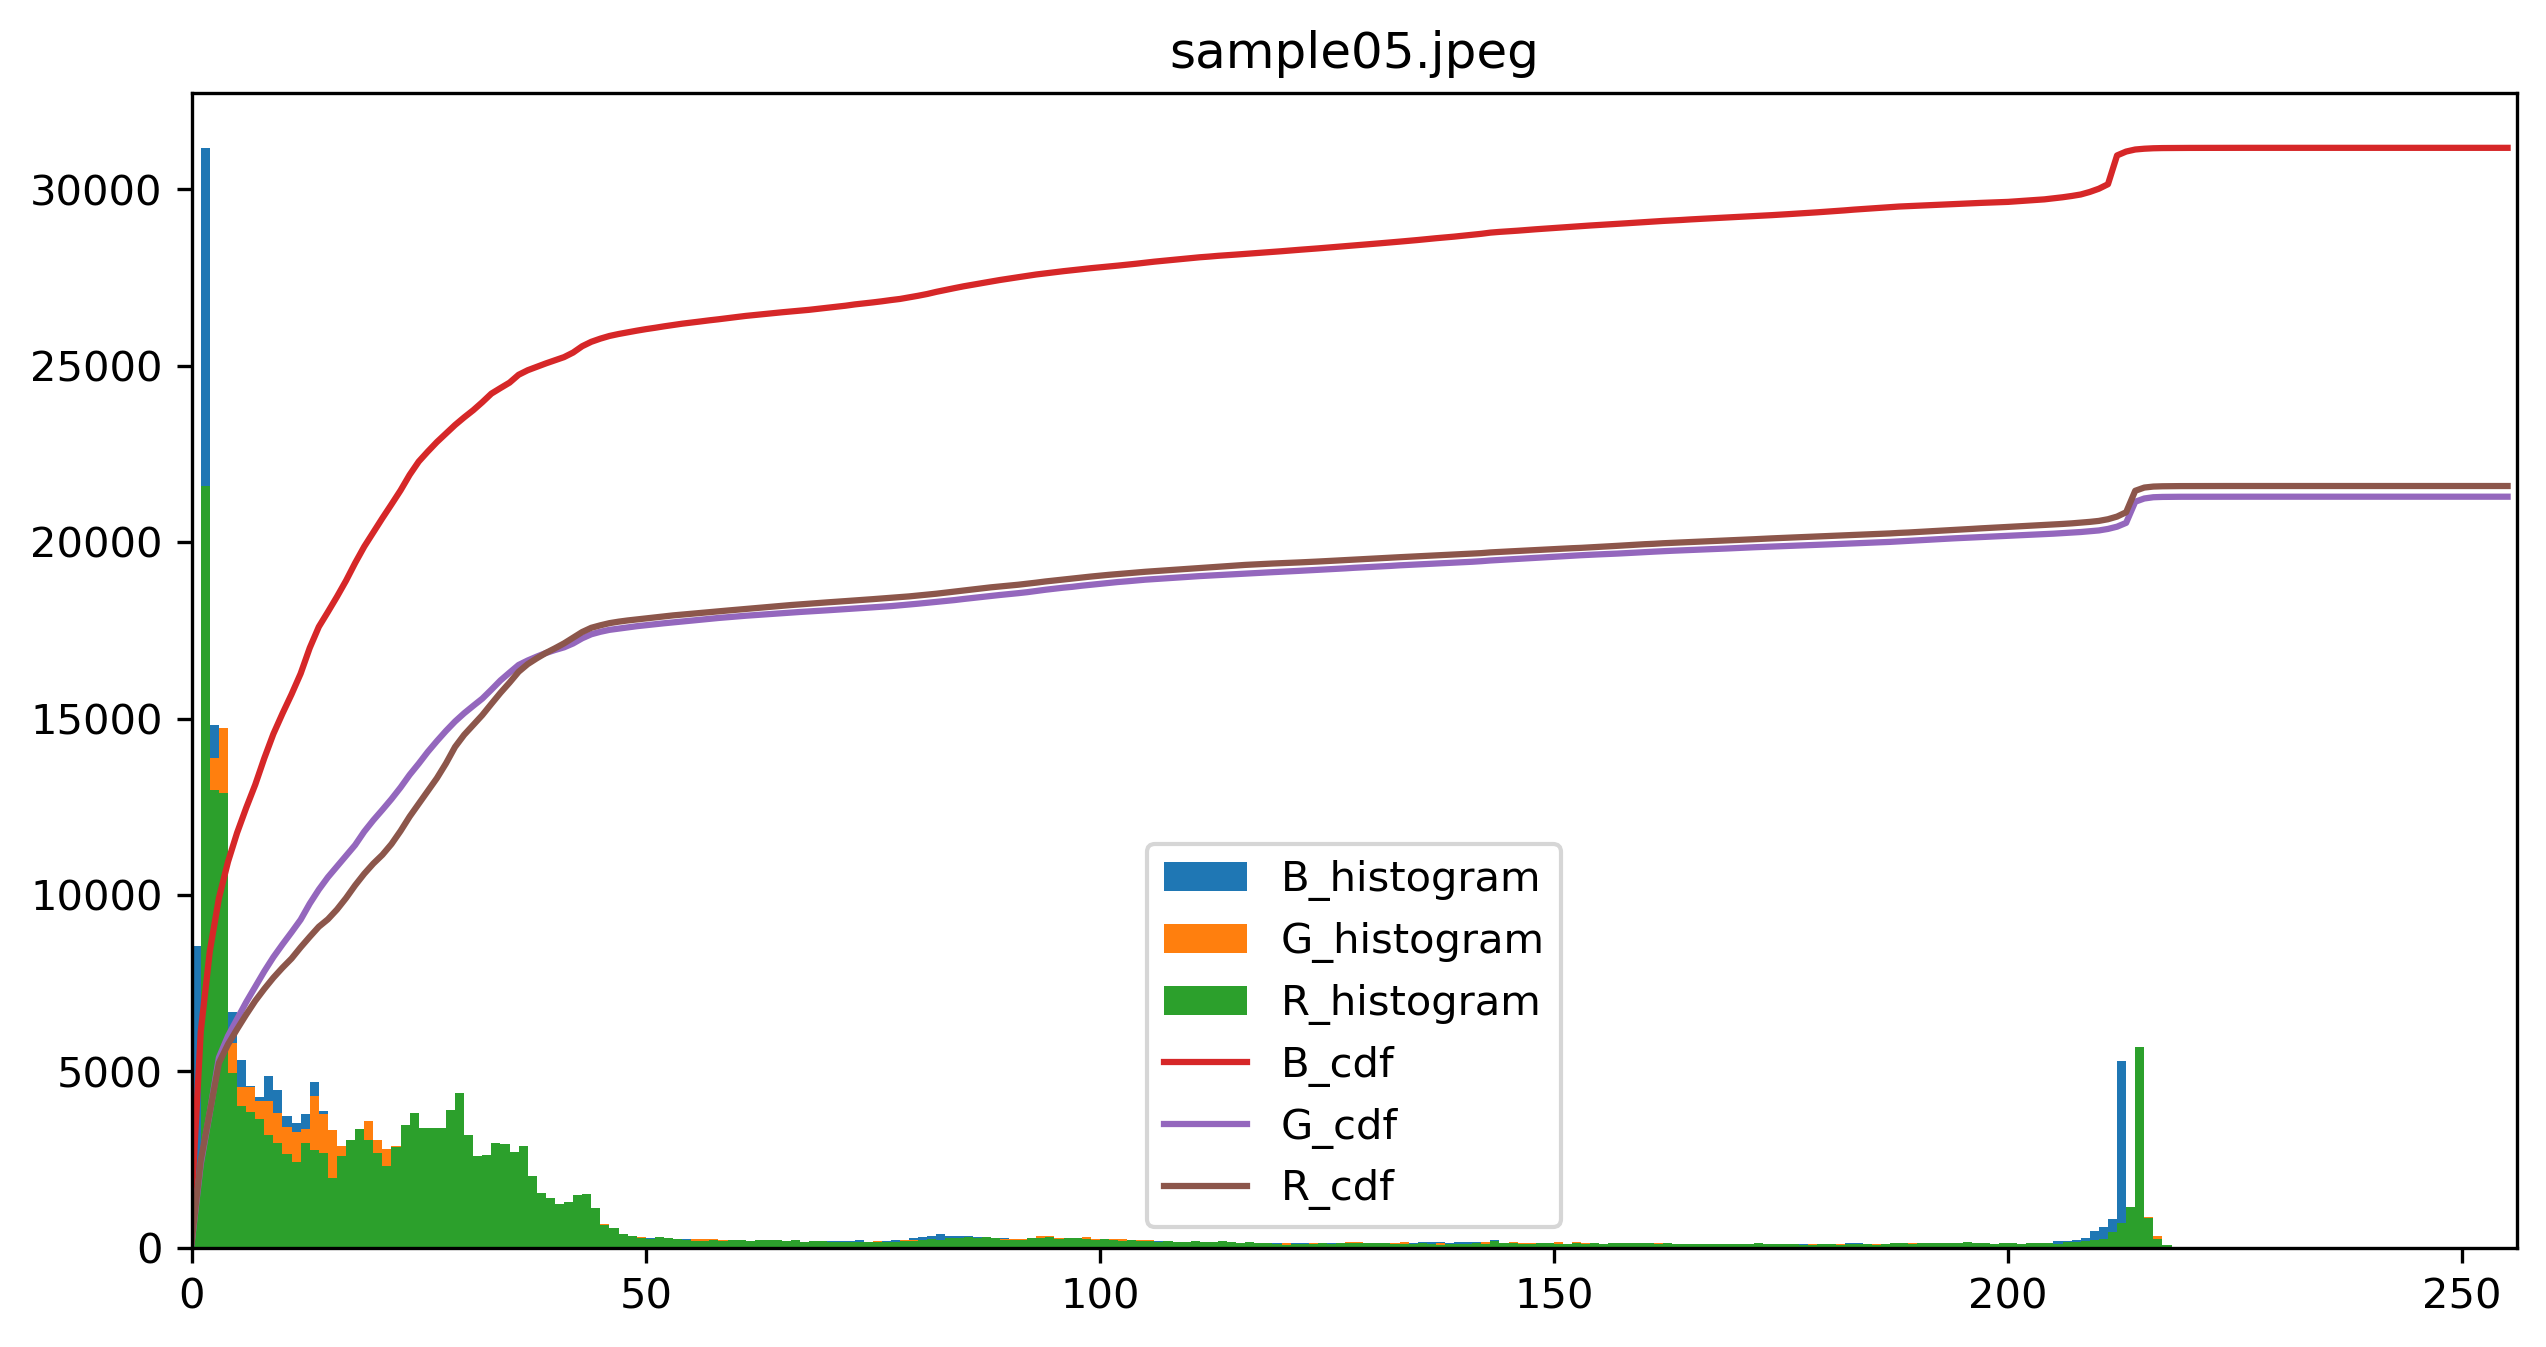

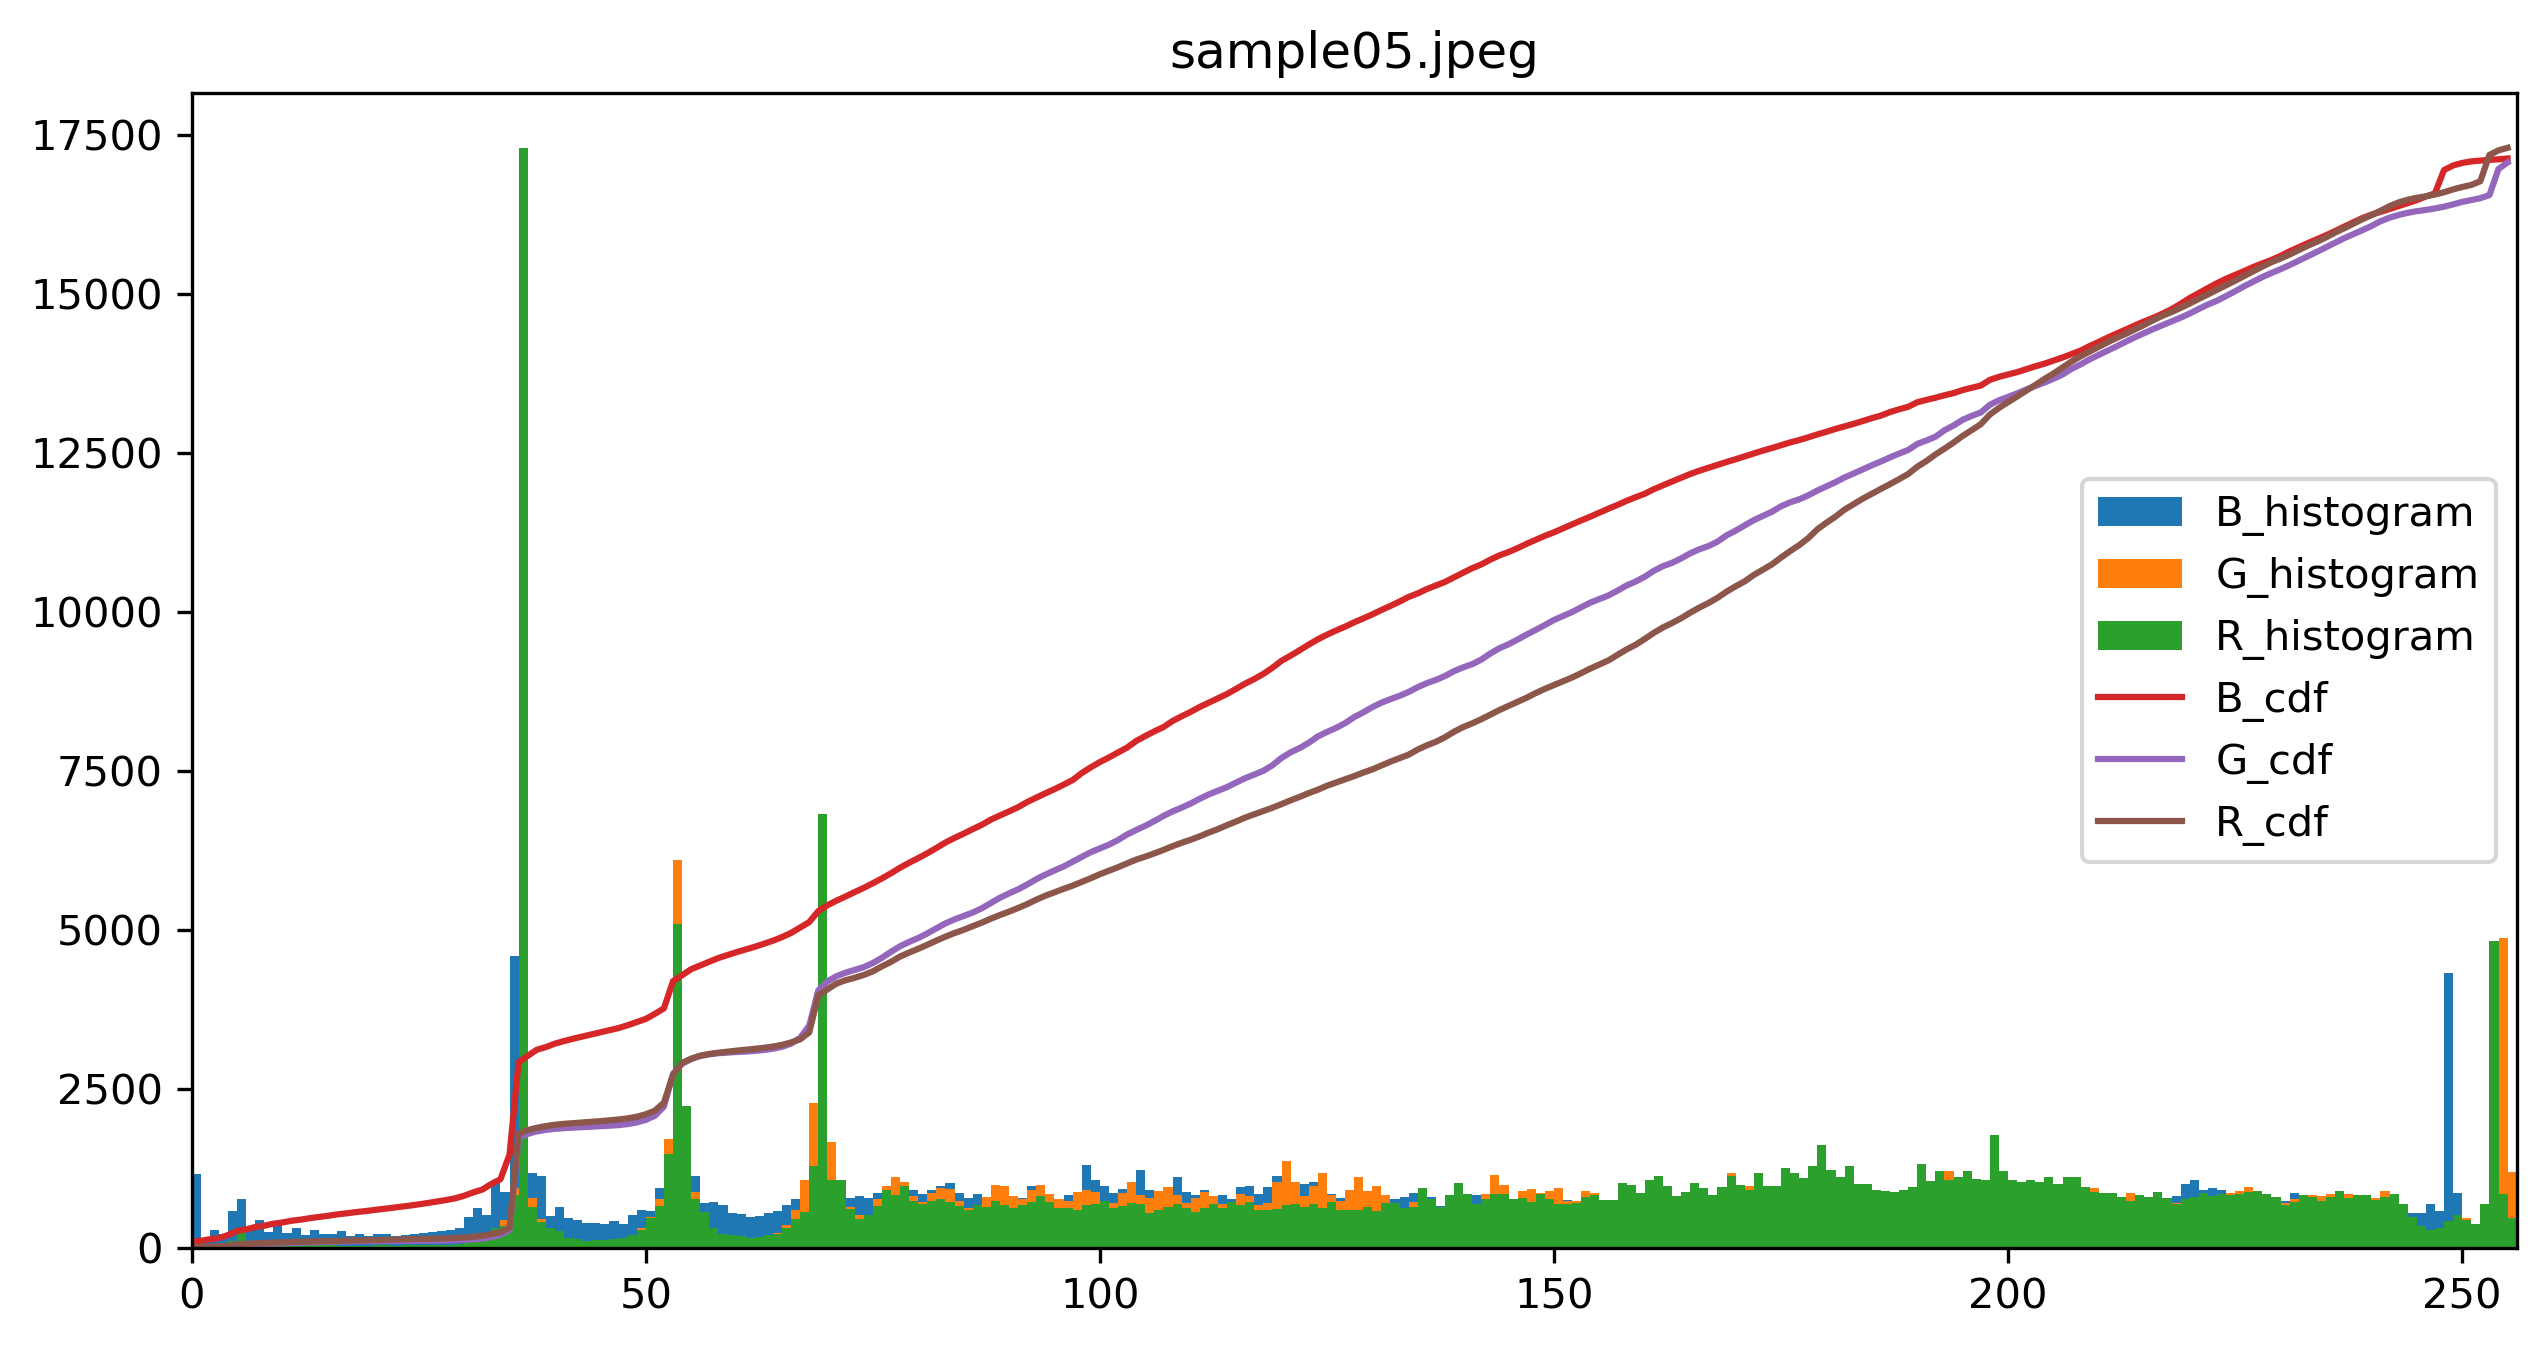

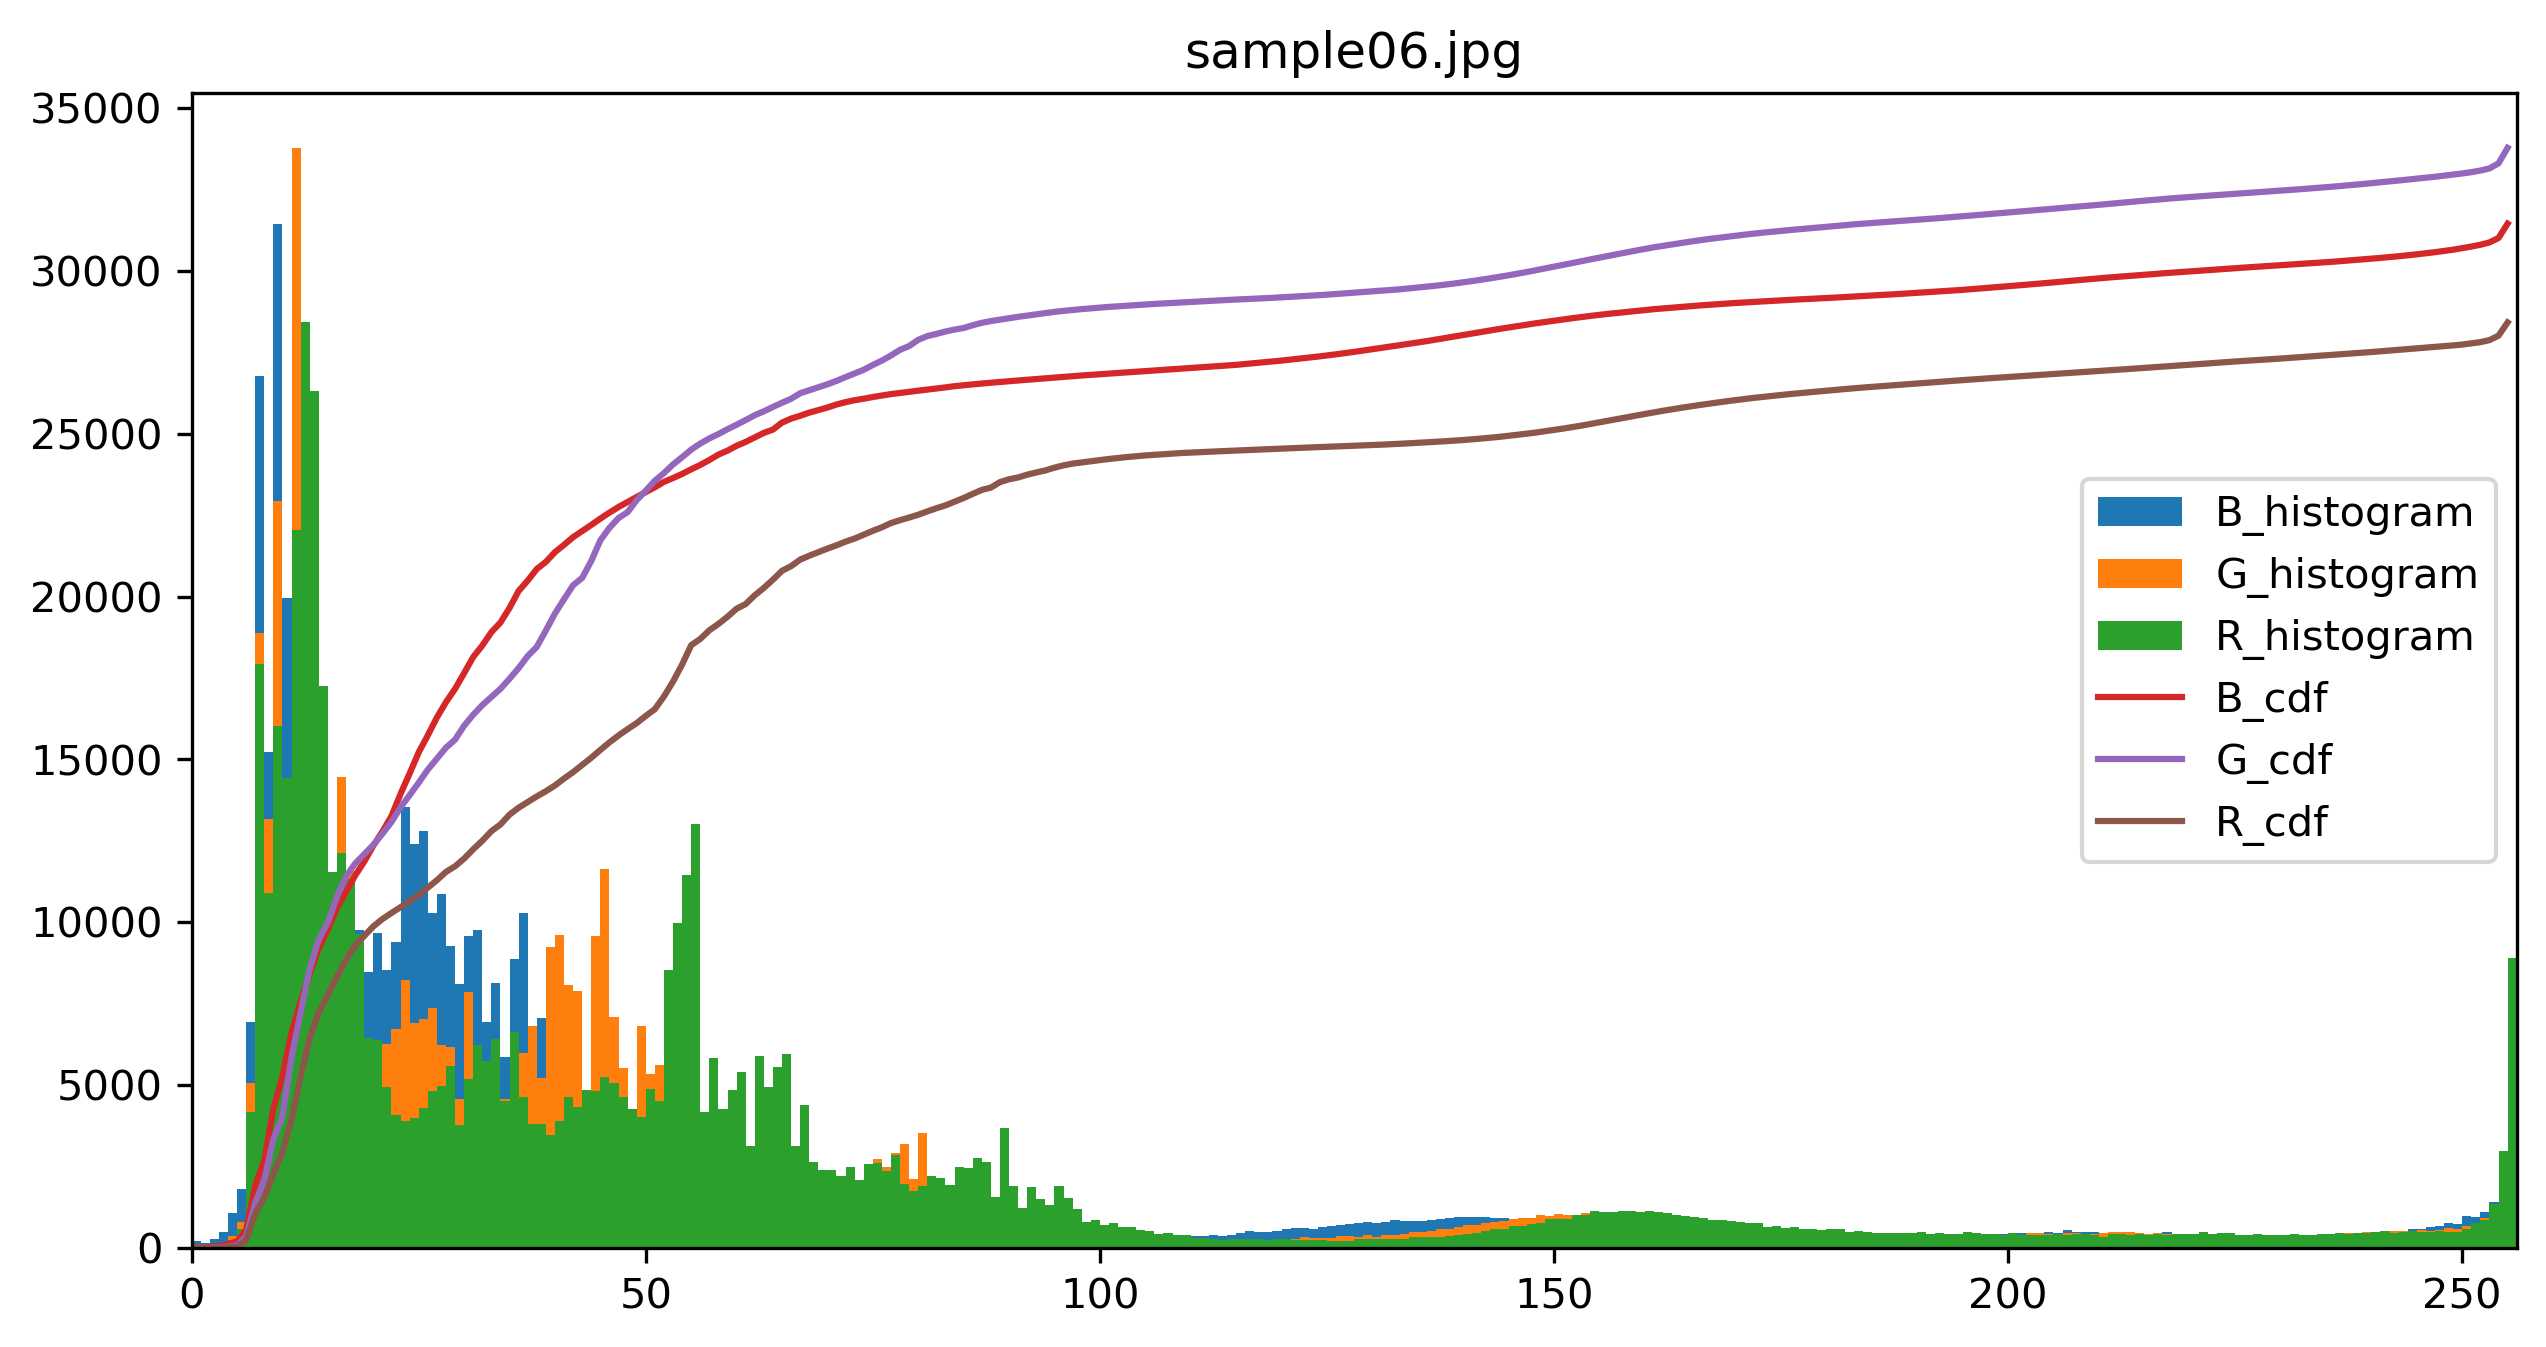

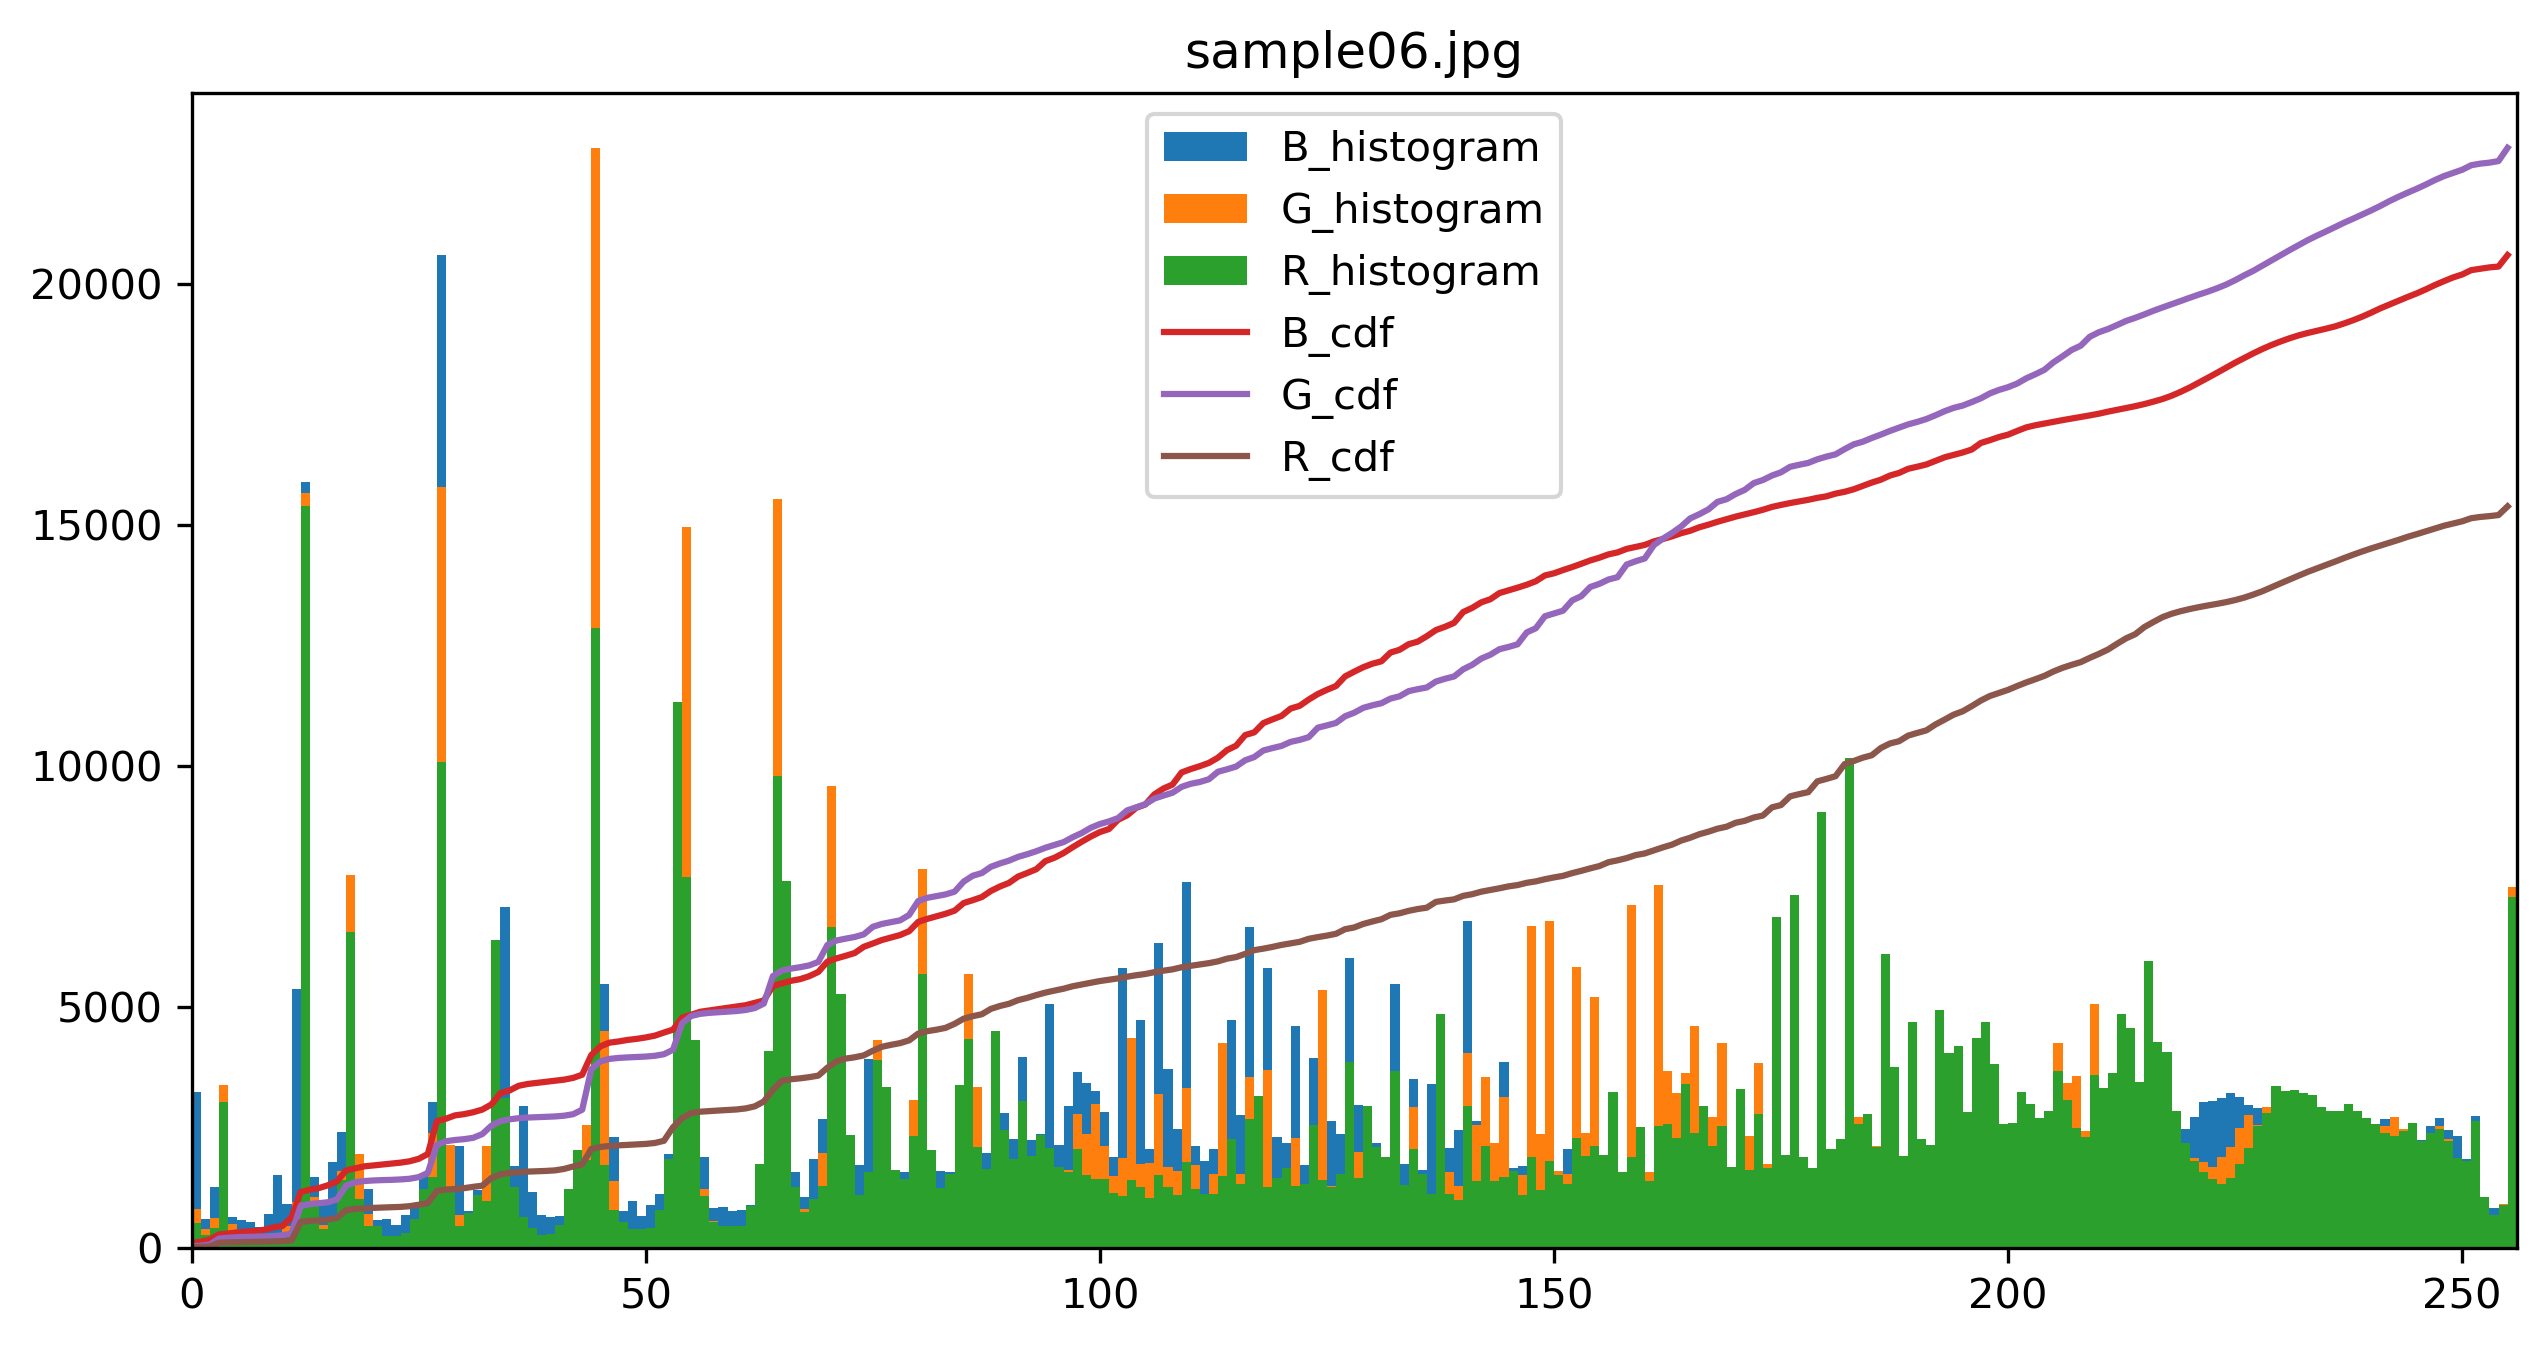

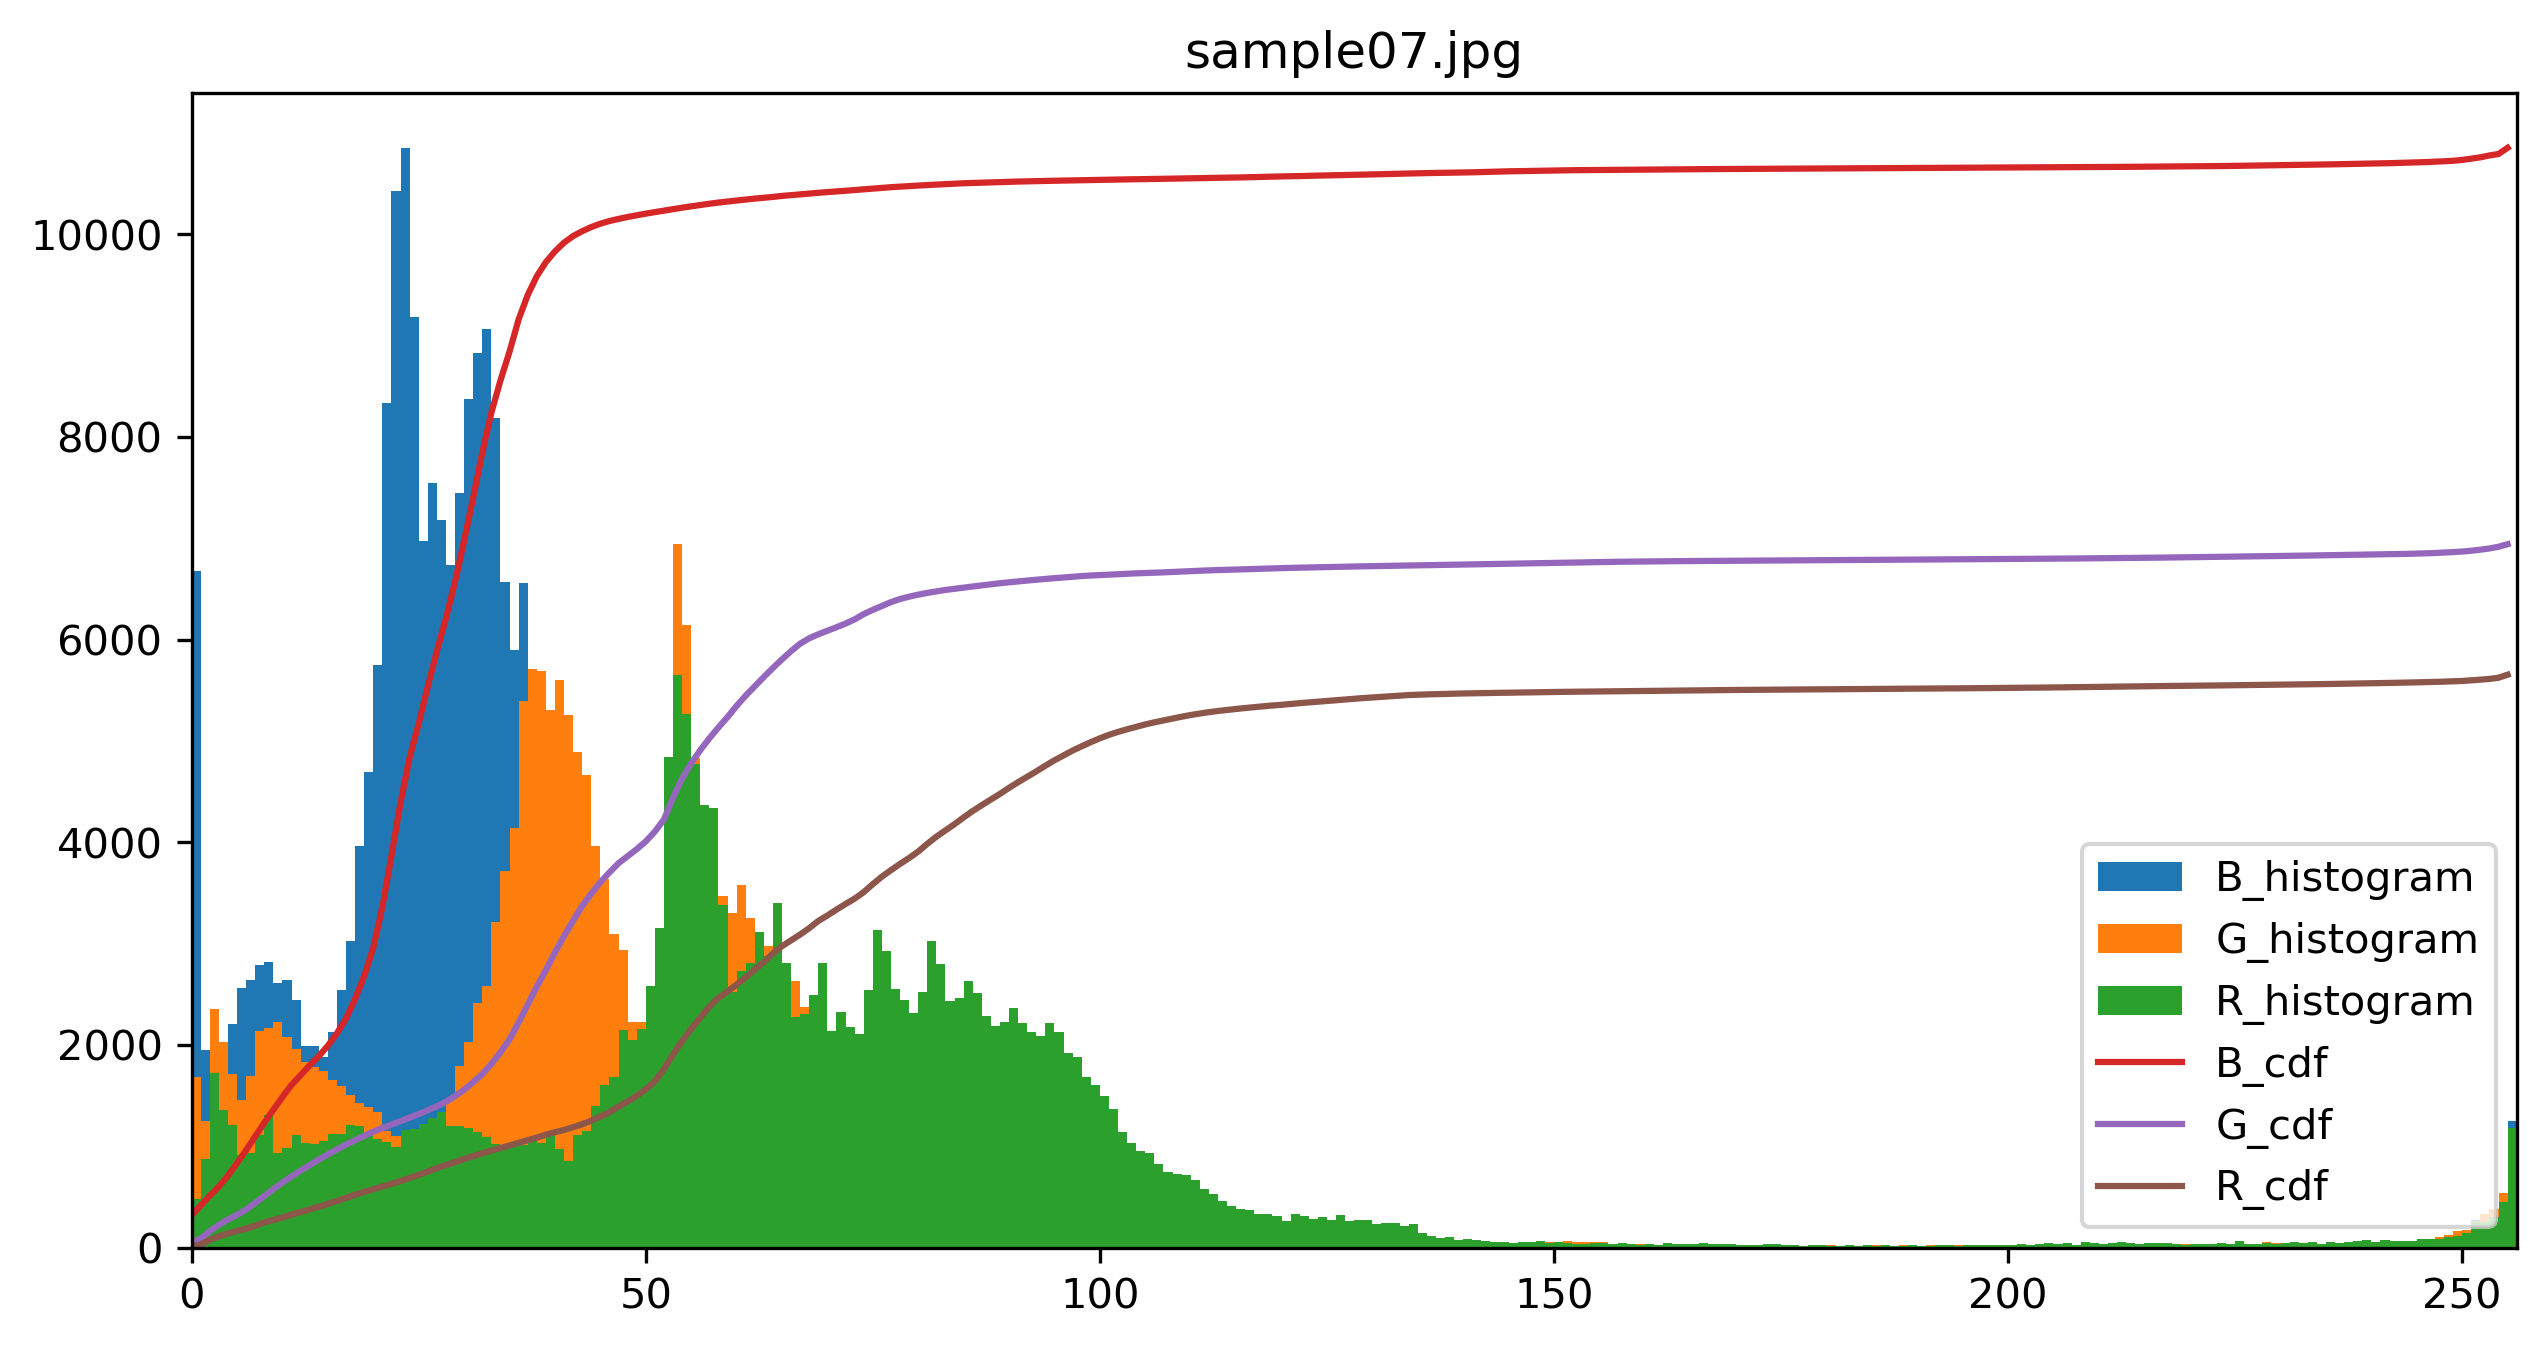

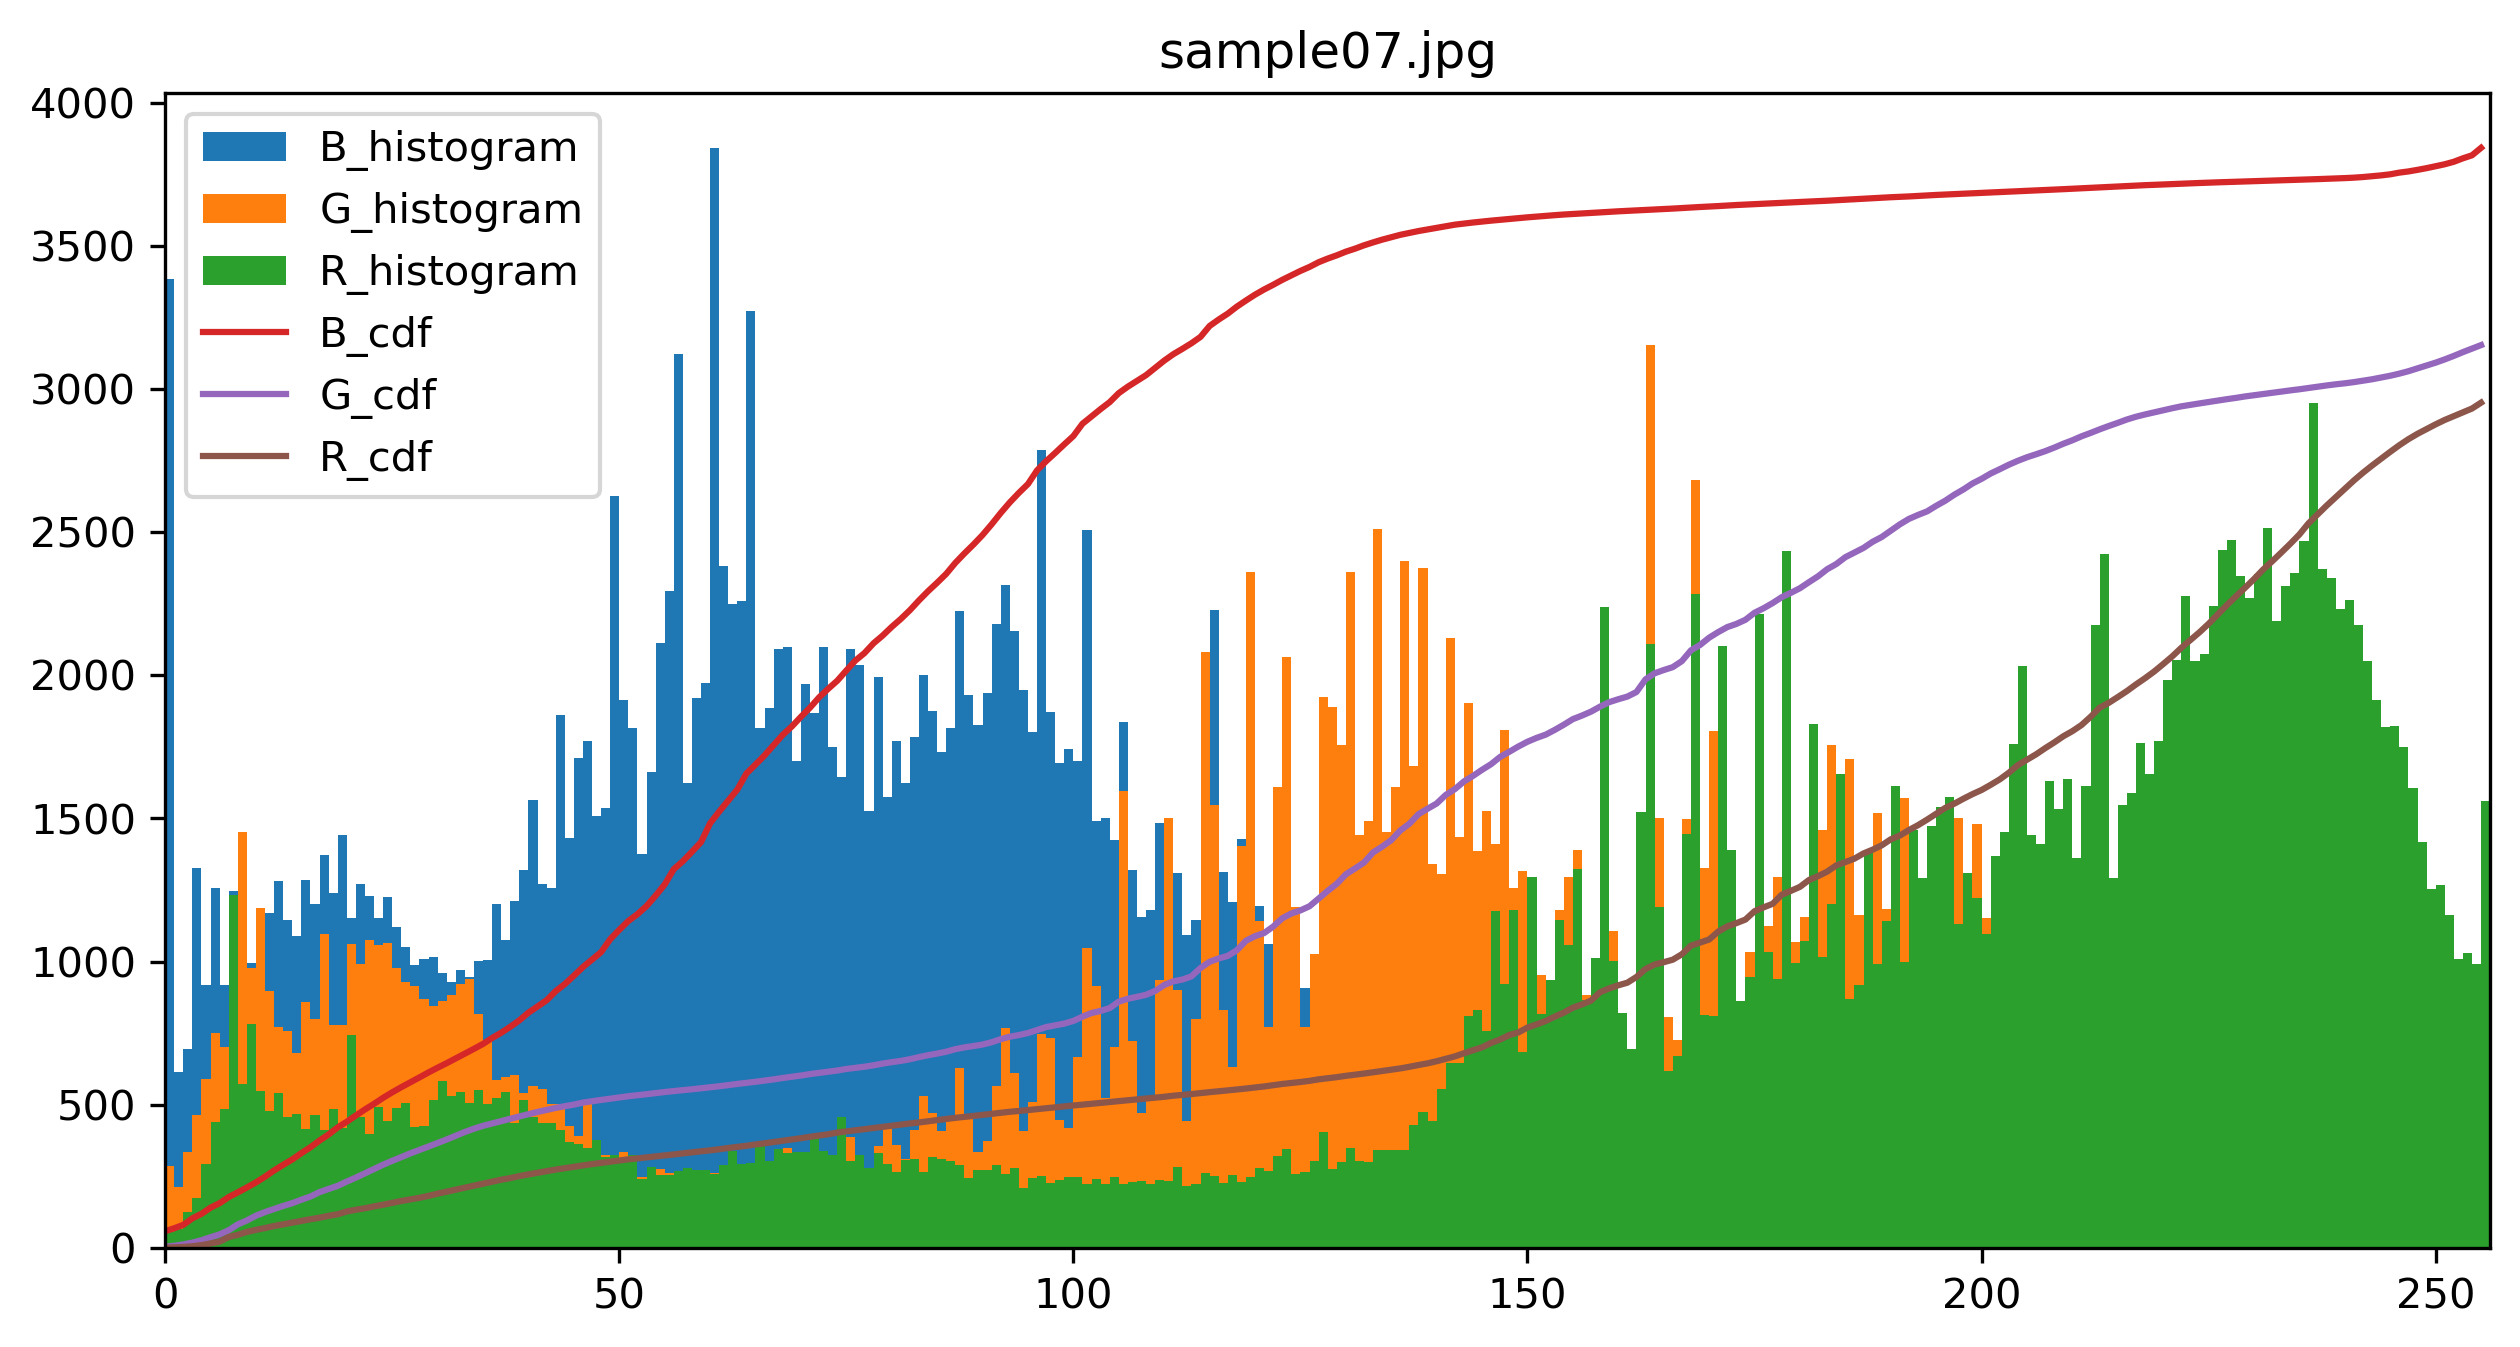

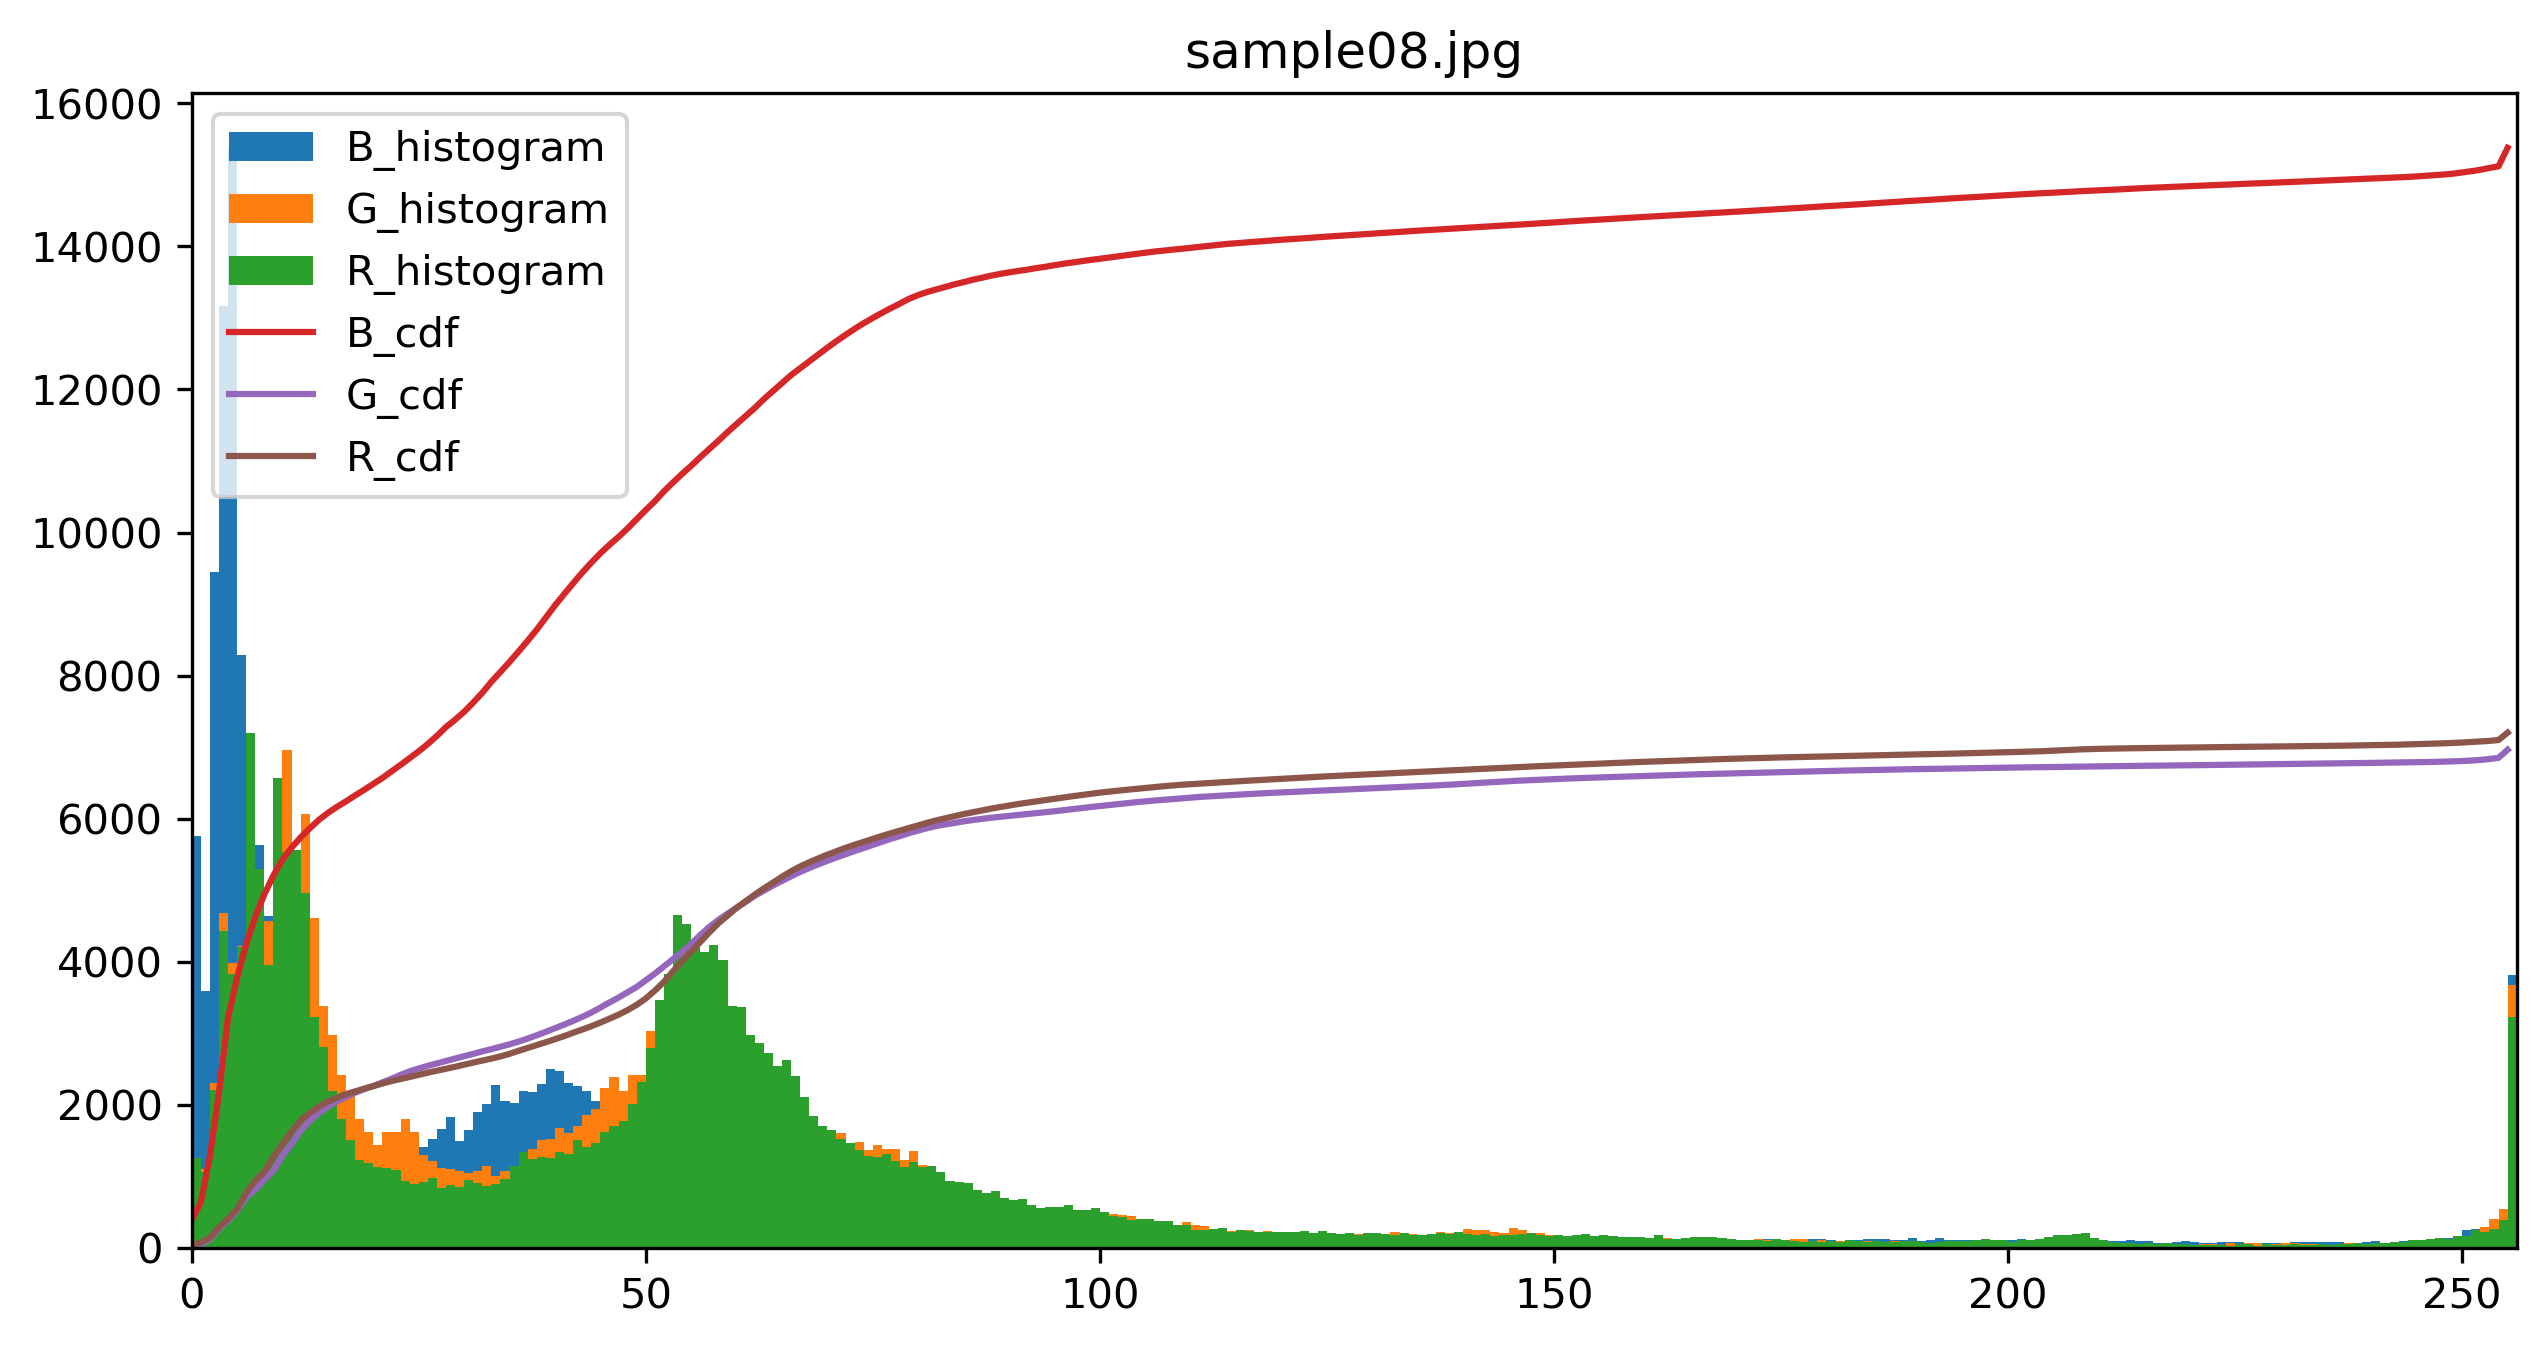

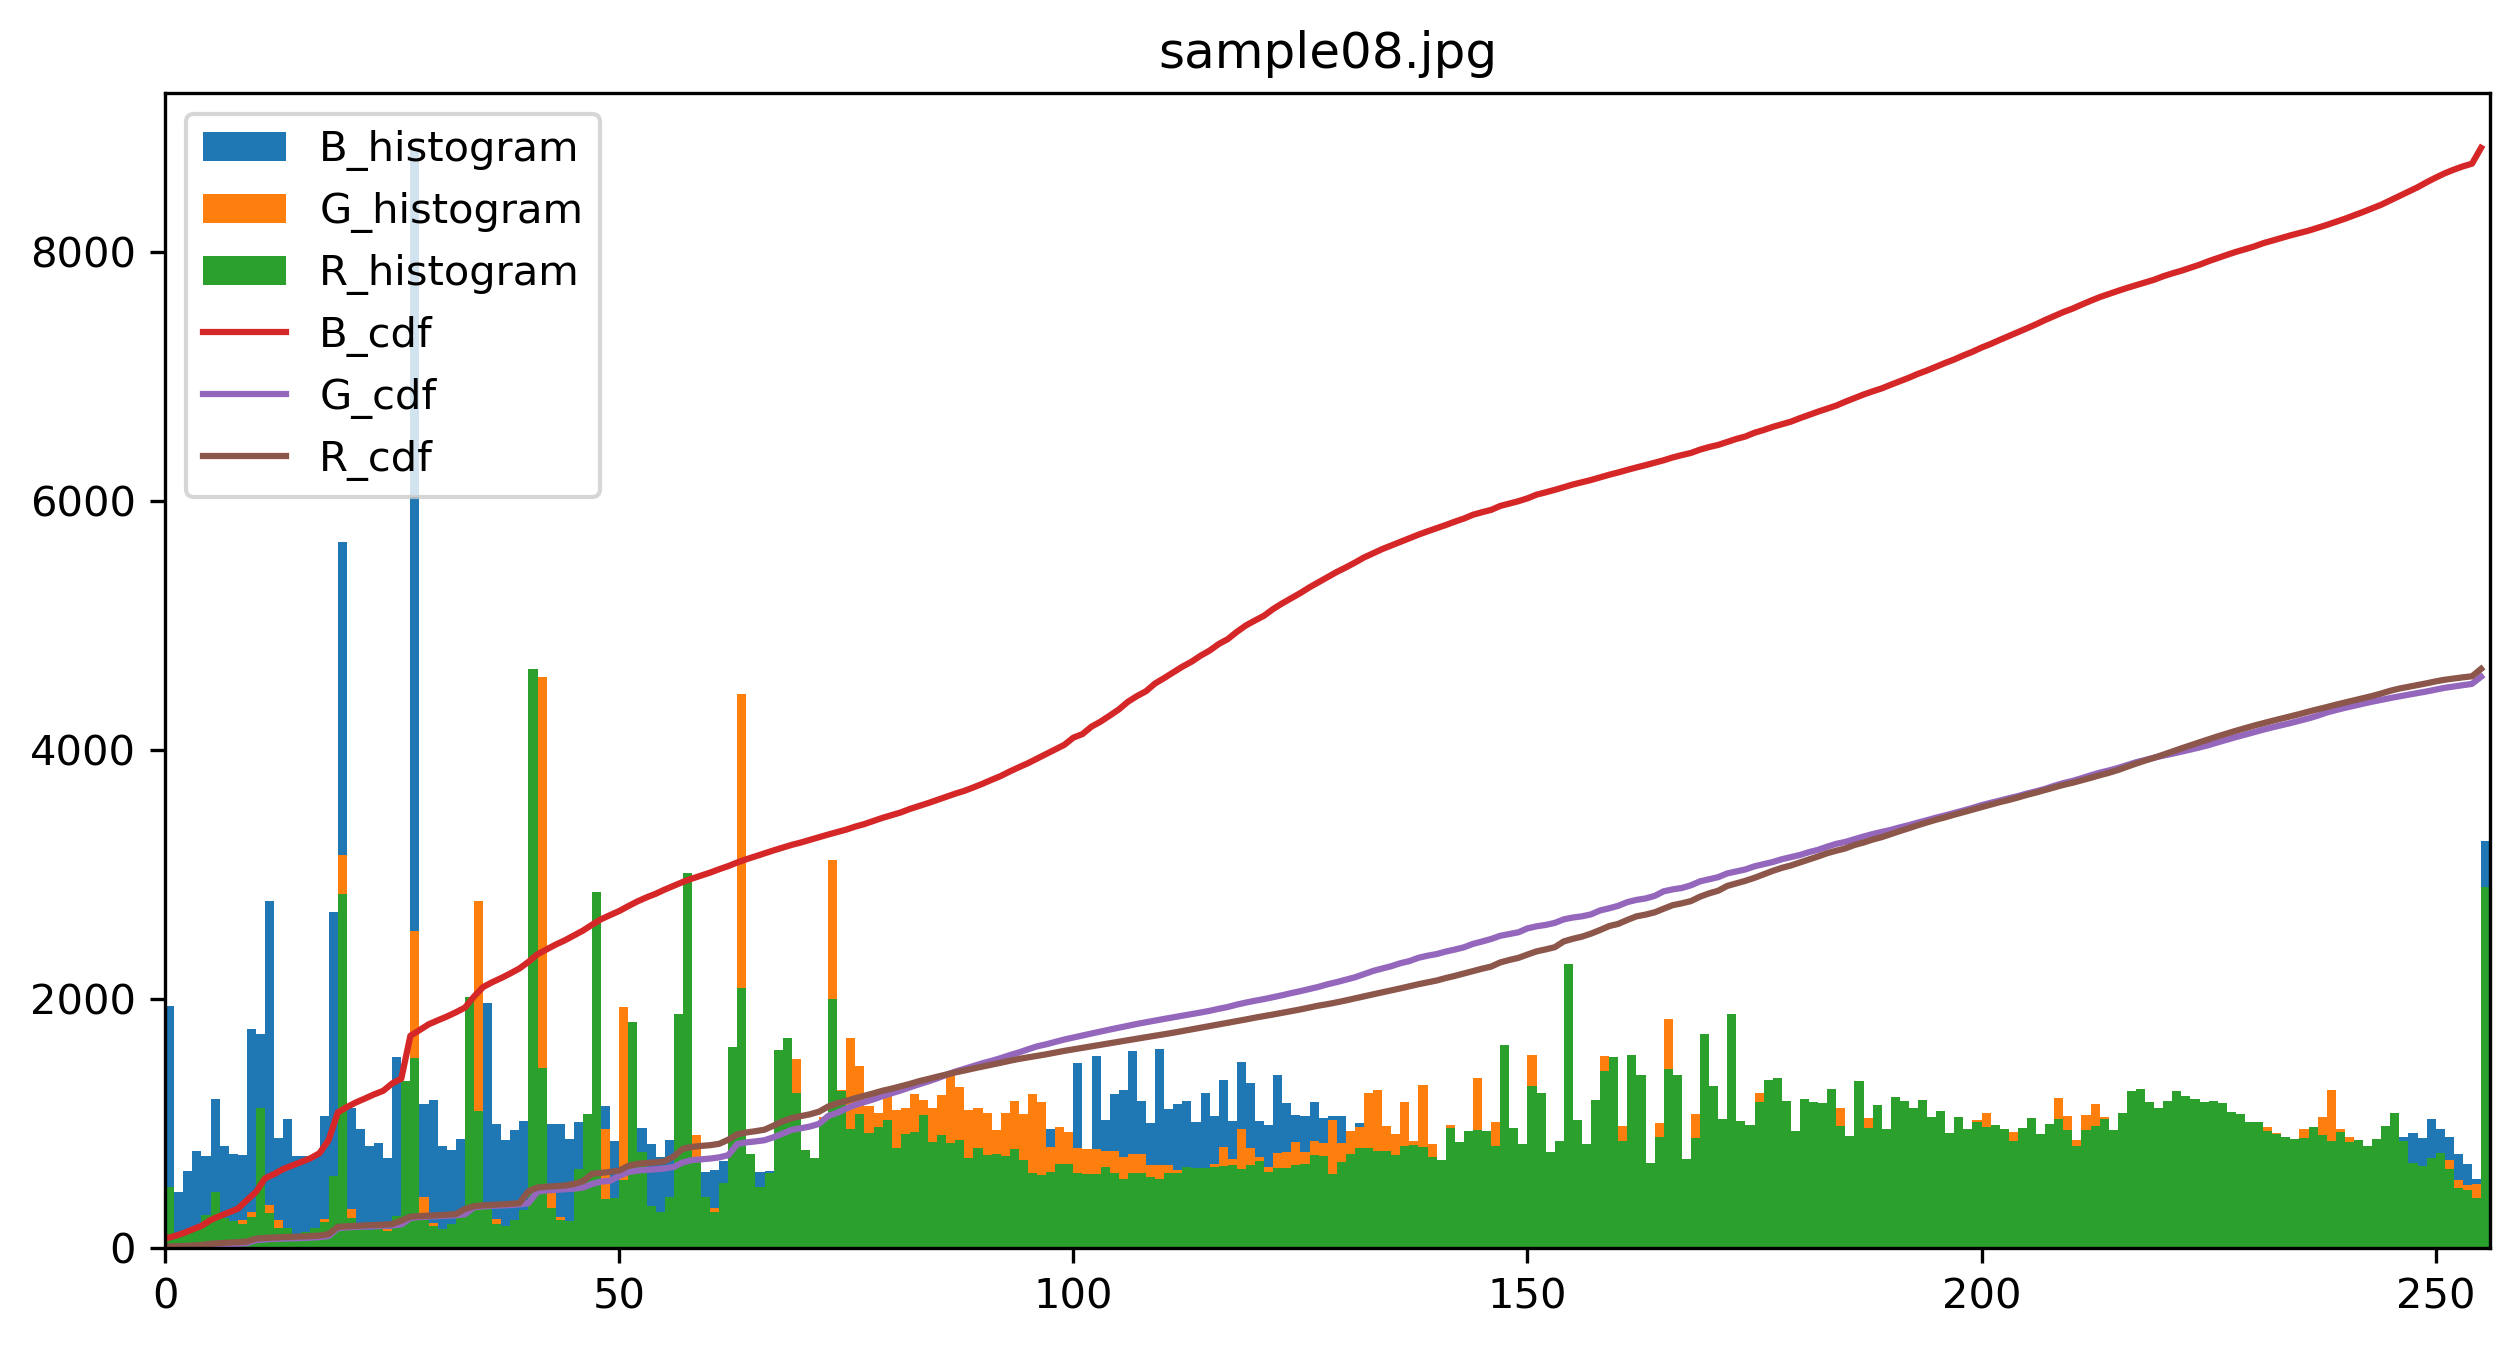

In [28]:
base_path1 = 'sample_images/'
base_path2 = 'HE_images/'
imgList = ["sample01.jpg", "sample02.jpeg", "sample03.jpeg", "sample04.jpeg", "sample05.jpeg", "sample06.jpg", "sample07.jpg", "sample08.jpg"]
for imgPath in imgList:
    plot_result(base_path1 + imgPath, imgPath, channels = True)
    plot_result(base_path2 + imgPath, imgPath, channels = True)